In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [4]:
dataframe = pd.read_csv("exports-to-european-countries.csv")

In [5]:
dataframe.shape

(2690579, 15)

In [6]:
dataframe.isnull().sum()

id                      0
date                    0
country_name            0
alpha_3_code        11662
country_code        11662
region                  0
region_code             0
sub_region              0
sub_region_code         0
hs_code                 0
commodity               0
unit                 3442
value_qt            28256
value_rs               13
value_dl           120899
dtype: int64

In [7]:
# Preview column names to verify
print("Columns:", dataframe.columns)

Columns: Index(['id', 'date', 'country_name', 'alpha_3_code', 'country_code', 'region',
       'region_code', 'sub_region', 'sub_region_code', 'hs_code', 'commodity',
       'unit', 'value_qt', 'value_rs', 'value_dl'],
      dtype='object')


In [8]:
# Group by 'commodity' and sum the 'qty'
top_commodities = (
    dataframe.groupby('commodity', as_index=False)['value_qt']
    .sum()
    .sort_values(by='value_qt', ascending=False)
    .head(100)
)

# Display the top 100 commodities
print(top_commodities)

                                              commodity      value_qt
1015  Automotive Diesel Fuel, Not Containing Biodies...  1.339832e+10
1022  Aviation Turbine Fuels, Kerosene Type Conformi...  9.095461e+09
6297                                             Others  1.629810e+09
4970                                              Other  1.089407e+09
2656                               Electro-Cardiographs  8.765733e+08
...                                                 ...           ...
3864                      Jute Hand Bags/Shopping Bags.  5.113179e+07
9155                        Textured Yarn Of Polyesters  5.109601e+07
5111  Other Ball-Point Pens Without Liquid Ink (For ...  5.104053e+07
5452                    Other Fruits Prepared/Preserved  5.049331e+07
9024                         T-Shirt Etc Of Othr Fibres  5.041409e+07

[100 rows x 2 columns]


In [9]:
# Group by 'commodity' and sum the 'qty' to get top 100 commodities
top_100_commodities = (
    dataframe.groupby('commodity')['value_qt']
    .sum()
    .sort_values(ascending=False)
    .head(100)
    .index
)

# Filter the original DataFrame to keep only rows with those top 100 commodities
filtered_df = dataframe[dataframe['commodity'].isin(top_100_commodities)]

# Display the filtered data
print(filtered_df)

              id        date  \
2              2  2015-01-01   
19            19  2015-01-01   
21            21  2015-01-01   
23            23  2015-01-01   
24            24  2015-01-01   
...          ...         ...   
2690569  2690569  2025-03-01   
2690571  2690571  2025-03-01   
2690572  2690572  2025-03-01   
2690574  2690574  2025-03-01   
2690576  2690576  2025-03-01   

                                              country_name alpha_3_code  \
2                                                  Albania          ALB   
19                                                 Albania          ALB   
21                                                 Albania          ALB   
23                                                 Albania          ALB   
24                                                 Albania          ALB   
...                                                    ...          ...   
2690569  United Kingdom of Great Britain and Northern I...          GBR   
2690571  United

In [10]:
filtered_df.shape

(345777, 15)

In [11]:
filtered_df.isnull().sum()

id                     0
date                   0
country_name           0
alpha_3_code        1325
country_code        1325
region                 0
region_code            0
sub_region             0
sub_region_code        0
hs_code                0
commodity              0
unit                   0
value_qt            2272
value_rs               2
value_dl           12939
dtype: int64

In [12]:
# Drop rows with any null values
filtered_df_clean = filtered_df.dropna()

# Show the shape before and after dropping null values
print("Shape before dropping null values:", filtered_df.shape)
print("Shape after dropping null values:", filtered_df_clean.shape)

# Update our DataFrame with the cleaned version
filtered_df = filtered_df_clean

# Verify that there are no more null values
print("\nNull values after cleaning:")
print(filtered_df.isnull().sum())

Shape before dropping null values: (345777, 15)
Shape after dropping null values: (330610, 15)

Null values after cleaning:
id                 0
date               0
country_name       0
alpha_3_code       0
country_code       0
region             0
region_code        0
sub_region         0
sub_region_code    0
hs_code            0
commodity          0
unit               0
value_qt           0
value_rs           0
value_dl           0
dtype: int64


In [13]:
# Optional: Save the filtered data to a new CSV
filtered_df.to_csv('top_100_commodities_full_data.csv', index=False)

In [14]:
df = pd.read_csv("top_100_commodities_full_data.csv")

In [15]:
# Check for duplicate records
duplicate_rows = df[df.duplicated()]

# Display number of duplicate rows
print(f"Number of duplicate records: {duplicate_rows.shape[0]}")

# Optionally, display the duplicate rows
if not duplicate_rows.empty:
    print("\nDuplicate Records:")
    print(duplicate_rows)
else:
    print("No duplicate records found.")

Number of duplicate records: 0
No duplicate records found.


In [16]:
df.head()

id        date country_name alpha_3_code  country_code  region  \
0   2  2015-01-01      Albania          ALB           8.0  Europe   
1  21  2015-01-01      Albania          ALB           8.0  Europe   
2  23  2015-01-01      Albania          ALB           8.0  Europe   
3  24  2015-01-01      Albania          ALB           8.0  Europe   
4  27  2015-01-01      Albania          ALB           8.0  Europe   

   region_code       sub_region  sub_region_code   hs_code  \
0          150  Southern Europe               39  29221990   
1          150  Southern Europe               39  61091000   
2          150  Southern Europe               39  68022190   
3          150  Southern Europe               39  68022390   
4          150  Southern Europe               39  76012020   

                     commodity unit  value_qt  value_rs  value_dl  
0                        Other  Kgs      0.02      4.97      0.01  
1       T-Shirts Etc Of Cotton  Nos     17.35     12.11      0.02  
2                       Others  Kgs     10.00      5.03      0.01  
3                       Others  Kgs    339.60     98.34      0.16  
4  Aluminium Billets - Alloyed  Kgs    150.00    247.37      0.40

In [17]:
df.shape

(330610, 15)

In [18]:
# --- Data Cleaning: Remove rows where commodity is 'Others' ---
print(f"Initial number of rows: {len(df)}")
# Define the exact commodity names to be removed
commodities_to_remove = ['Others']
# Filter the DataFrame, keeping only rows where 'commodity' is NOT in the removal list.
# Using .isin() is precise and avoids accidentally removing commodities that contain the word 'Other'.
df = df[~df['commodity'].isin(commodities_to_remove)]
print(f"Number of rows after removing 'Others': {len(df)}")

Initial number of rows: 330610
Number of rows after removing 'Others': 178200


In [19]:
# --- Define the mapping from commodity to category ---
# Based on the user-provided reference. Ambiguities are resolved by selecting the most logical category.
# For example, Benzene is categorized as a Chemical, not a Metal.
commodity_to_category_map = {
    # 1. Textiles & Garments
    'T-Shirts Etc Of Cotton': 'Textiles & Garments',
    'Nightdresses And Pyjamas Of Cotton': 'Textiles & Garments',
    'T-Shirt Etc Of Othr Fibres': 'Textiles & Garments',
    'Hand Bags/Shopping Bags Of Cotton': 'Textiles & Garments',
    'Jute Hand Bags/Shopping Bags': 'Textiles & Garments',
    'Other Hosiery Goods Of Cotton': 'Textiles & Garments',
    'Grey': 'Textiles & Garments',
    'Hessian Cloth Contng 100% By Wt Of Jute': 'Textiles & Garments',
    'Textured Yarn Of Polyesters': 'Textiles & Garments',
    'Othr Wven Fbrcs From Strip/The Like': 'Textiles & Garments',
    'Staple Fibres Of Polyester Nt Crd/Cmbd': 'Textiles & Garments',
    'Flexible Intermediate Bulk Containers Of Man Made Textile Materials': 'Textiles & Garments',
    'Of Cotton: Other': 'Textiles & Garments',
    'Jute Hand Bags/Shopping Bags.': 'Textiles & Garments',
    'Hessian Cloth Cntng 100% By Wt Of Jute.': 'Textiles & Garments',
    'Other Stone Cut(Topaz Aquamarine Etc)': 'Textiles & Garments',
    'Hessian Cloth Cntng 100% By Wt Of Jute.': 'Textiles & Garments',
    'Jute Hand Bags/Shopping Bags.': 'Textiles & Garments',

    # 2. Food, Agriculture & Animal Products
    'Basmati Rice': 'Food, Agriculture & Animal Products',
    'Rice Parboiled': 'Food, Agriculture & Animal Products',
    'Rice Excptg Parboiled (Excl Basmati Rice)': 'Food, Agriculture & Animal Products',
    'Other Sesamum Seeds W/N Broken': 'Food, Agriculture & Animal Products',
    'Cucumbers And Gherkins Provisionally Presvd': 'Food, Agriculture & Animal Products',
    'Cucmbrs And Ghrkns Prpd/Prsvd By Acetic Acid': 'Food, Agriculture & Animal Products',
    'Other Fruits Prepared/Preserved': 'Food, Agriculture & Animal Products',
    'Coffee Rob Cherry Other Grade': 'Food, Agriculture & Animal Products',
    'Coffee Rob Cherry AB': 'Food, Agriculture & Animal Products',
    'Grapes Fresh': 'Food, Agriculture & Animal Products',
    'Guar Meal': 'Food, Agriculture & Animal Products',
    'Meal Of Soyabean,Solvent Extracted (Defatted) Variety': 'Food, Agriculture & Animal Products',
    'Guargum: Others': 'Food, Agriculture & Animal Products',
    'Vannamei Shrimp (Litopenaeus Vannamei)': 'Food, Agriculture & Animal Products',
    'Coffee Rob Cherry Ab': 'Food, Agriculture & Animal Products',
    
    # 3. Minerals, Stones & Ceramics
    'Sandstone': 'Minerals, Stones & Ceramics',
    'Other Granite': 'Minerals, Stones & Ceramics',
    'Granite Crude Or Roughly Trimmed': 'Minerals, Stones & Ceramics',
    'Setts Curbstones And Flagstones Of Natural Stone(Except Slate)': 'Minerals, Stones & Ceramics',
    'Other Stone': 'Minerals, Stones & Ceramics',
    'Other Stone Cut (Topaz Aquamarine Etc)': 'Minerals, Stones & Ceramics',
    'Ball Clay': 'Minerals, Stones & Ceramics',
    'Other Kaoline-Cersmic Grade': 'Minerals, Stones & Ceramics',
    'Agate': 'Minerals, Stones & Ceramics',
    'Of A Water Absorption Coefficient By Weight Not Exceeding 0.5%': 'Minerals, Stones & Ceramics',
    'Other Stone Cut(Topaz Aquamarine Etc)': 'Minerals, Stones & Ceramics',


    # 4. Petroleum, Fuels & Chemicals
    'Automotive Diesel Fuel, Not Containing Biodiesel, Conforming To Standard IS 1460': 'Petroleum, Fuels & Chemicals',
    'High Flash High Speed Diesel Fuel Conforming To Standard IS 16861': 'Petroleum, Fuels & Chemicals',
    'Aviation Turbine Fuels, Kerosene Type Conforming To Standard IS 1571': 'Petroleum, Fuels & Chemicals',
    'Vacuum Gas Oil': 'Petroleum, Fuels & Chemicals',
    'Castor Oilandits Frctns Othr Thn Edble Grade': 'Petroleum, Fuels & Chemicals',
    'Carbon Blacks': 'Petroleum, Fuels & Chemicals',
    'Benzene': 'Petroleum, Fuels & Chemicals',
    'Other Amino Sulphonic Aniline Etc Nes': 'Petroleum, Fuels & Chemicals',
    'Other Industrial Monocarboxylic Fatty Acid': 'Petroleum, Fuels & Chemicals',
    'Aviation Turbine Fuels, Kerosene Type Conforming To Standard Is 1571': 'Petroleum, Fuels & Chemicals',
    'Othr Bentonite (Incl. Processed, Activatedand Ground': 'Petroleum, Fuels & Chemicals',
    'Automotive Diesel Fuel, Not Containing Biodiesel, Conforming To Standard Is 1460': 'Petroleum, Fuels & Chemicals',
    'High Flash High Speed Diesel Fuel Conforming To Standard Is 16861': 'Petroleum, Fuels & Chemicals',

    # 5. Metals & Metallurgical Products
    'Aluminium Billets - Alloyed': 'Metals & Metallurgical Products',
    'Aluminium Ingots-Not Alloyed': 'Metals & Metallurgical Products',
    'Bright Bars-Nckl Chromium Austenitic Type': 'Metals & Metallurgical Products',
    'Othr Screws And Bolts W/N Wth Nuts Or Washers Threaded': 'Metals & Metallurgical Products',
    'Other Cast Artcles Of Iron Malleable': 'Metals & Metallurgical Products',
    'Other Cast Articles Of Iron Or Steel N.E.S': 'Metals & Metallurgical Products',
    'All Other Articles Of Iron/Steel Nes': 'Metals & Metallurgical Products',
    'Ferro-Silico-Manganese': 'Metals & Metallurgical Products',
    'Fero-Manganese,Carbon Contng>2% By Weight': 'Metals & Metallurgical Products',
    'Other Ferro-Manganese': 'Metals & Metallurgical Products',
    'Othr Prdcts Of Iron/Non-Alloy Steel Otherwise Pltd/Cotd Wth Zinc': 'Metals & Metallurgical Products',
    'Flt-Rld Prdcts Of Iron/Non Aloy Stl Pltd Or Cotd Wth Aluminium Zinc Alloys': 'Metals & Metallurgical Products',
    'Wire Of Stainls Stl Thicker Than 1.5 Mm': 'Metals & Metallurgical Products',
    'Other,Welded,Of Circular Cross-Section, Made Up Of Of Non-Ally Steel Tube/Pipes': 'Metals & Metallurgical Products',
    'Strips Of Flt Rld Prdcts In Coils Nt Frthrwrkd Thn Cold Rld Of Thckns >1Mm But <3Mm': 'Metals & Metallurgical Products',
    'Strips Of Flt Rld Prdcts In Coils Nt Frthrwrkd Thn Cold Rld Of Thckns>=0.5Mm But<1Mm': 'Metals & Metallurgical Products',
    'Sheets Of Flat-Rold Prdcts In Coils Of A Thckns< 3 Mm Hot-Rld,Excl.Pickl': 'Metals & Metallurgical Products',
    'Strips Of Flat-Rold Prdcts In Coils Of A Thckns>=3 But< 4.75Mm Hot-Rld,Excl.Pickl': 'Metals & Metallurgical Products',
    'Strips Of Flat-Rold Prdcts In Coils Of A Thckns< 3 Mm Hot-Rld,Excl.Pickl': 'Metals & Metallurgical Products',
    'Unvrsl Plates Of Flat-Rold Prdcts Not In Coils Of Thckns Excd 10 Mm Hot-Rld Pickld': 'Metals & Metallurgical Products',
    'Other Plates,Sheets,Strips': 'Metals & Metallurgical Products',
    'Othr Iron/Non Aloy Steel In Prmry Frms Nes': 'Metals & Metallurgical Products',
    'Spun Pipe': 'Metals & Metallurgical Products',
    'Agglomerated Iron Ore Pellets': 'Metals & Metallurgical Products',
    'Alumina Calcined, Metallurgical Grade, Conforming To Is 17441': 'Metals & Metallurgical Products',
    'All Other Articles Of Iron/Steel Nes Other Steering Or Rudder Equipment For Ships And Boats, N.E.S.': 'Metals & Metallurgical Products',

    # 6. Electronics, Electricals & Telecom
    'Sim Cards': 'Electronics, Electricals & Telecom',
    'Optical Fibre Cables Other Thn Lead Alloy Sheathd Cables': 'Electronics, Electricals & Telecom',
    'Proximity Cards And Tags': 'Electronics, Electricals & Telecom',
    'Othr Elctrc Cndctrs Not Fitted Wth Connctrs Used In Telecom Fr <=1000V Excl Papr Plsctic And Rubber Insulated': 'Electronics, Electricals & Telecom',
    'Plstic Insltd Cndctrs Fr <= 1000V Not Fitted With Connectors': 'Electronics, Electricals & Telecom',
    'Othr Fxd Capactrs Dielctrc Of Papr/Plstcs': 'Electronics, Electricals & Telecom',
    'Plugs And Sockets Of Plstcs': 'Electronics, Electricals & Telecom',
    'Prdcts Paintd,Vrnshd/Coatd Wth Plstcs': 'Electronics, Electricals & Telecom',
    'Fxd Crbn Resistors,Composition/Film Types': 'Electronics, Electricals & Telecom',
    'Electro-Cardiographs': 'Electronics, Electricals & Telecom',

    # 7. Medical & Surgical Equipment
    'Surgical Knives,Sciss0Rs And Blade': 'Medical & Surgical Equipment',
    'Cannulae': 'Medical & Surgical Equipment',
    'Syringes,W/N With Needles': 'Medical & Surgical Equipment',
    'Catheters (For Urine,Stool)': 'Medical & Surgical Equipment',
    'Of A Kind Used For Medical, Surgical, Dental Or Veterinary Purposes': 'Medical & Surgical Equipment',

    # 8. Machinery & Industrial Components
    'Otr Prtsandaccssrs Of Vhcls Of Hdg 8701-8705': 'Machinery & Industrial Components',
    'Prts Of Othr Excvtng,Lvlng,Tmpng And Excvtngmchnry Fr Earth Mnrl/Ores,Slf-Prpld': 'Machinery & Industrial Components',
    'Bords,Panels,Consoles Etc.Fr Indstrl Use': 'Machinery & Industrial Components',
    'All Other Articles Of Iron/Steel Nes Other Steering Or Rudder Equipment For Ships And Boats, N.E.S.': 'Machinery & Industrial Components',

    # 9. Plastic, Packaging & Related
    'Pltes Shts Etc Of Plyethyln Terephthalte Flexible, Plain': 'Plastic, Packaging & Related',
    'Sack And Bag (Incl Cones)Of Othr Plastic Nes': 'Plastic, Packaging & Related',

    # 10. Stationery & Consumer Goods
    'Tooth Brushes': 'Stationery & Consumer Goods',
    'Other Ball-Point Pens With Liquid Ink (For Rolling Ball Pen)': 'Stationery & Consumer Goods',
    'Other Ball-Point Pens Without Liquid Ink (For Rolling Ball Pen)': 'Stationery & Consumer Goods',
    'Parts Of Lighters': 'Stationery & Consumer Goods',

    # 11. Toys & Miscellaneous
    'Non-Electronic Toys Etc.': 'Toys & Miscellaneous',
    'C0Ir Pith': 'Toys & Miscellaneous',
    
    # 12. Other
   'Other': 'Other',

}

In [20]:
# --- Process the DataFrame ---

# Create the new 'categories' column by mapping the 'commodity' column using the dictionary
# .map() is an efficient way to apply this transformation
categories_column = df['commodity'].map(commodity_to_category_map)

# Find the index position of the 'commodity' column
try:
    commodity_index = df.columns.get_loc('commodity')
    # The new column will be inserted at the position immediately after 'commodity'
    insert_position = commodity_index + 1

    # Insert the newly created column into the DataFrame at the calculated position
    df.insert(insert_position, 'categories', categories_column)

    print("Success: The 'categories' column has been created and inserted.")

except KeyError:
    print("Error: The 'commodity' column was not found in the CSV file.")
    exit()


Success: The 'categories' column has been created and inserted.


In [21]:
# --- Verification and Output ---

# Display the first 10 rows of the key columns to show the result
print("\n--- DataFrame Head with New 'categories' Column ---")
print(df[['commodity', 'categories', 'value_rs']].head(10))

# Display the distribution of the new categories to get an overview
print("\n--- Distribution of Categories ---")
print(df['categories'].value_counts())

# Check for any commodities that were not successfully mapped to a category
unmapped_count = df['categories'].isnull().sum()
if unmapped_count > 0:
    print(f"\nWarning: Found {unmapped_count} rows with unmapped commodities.")
    print("This means their 'commodity' name was not in the provided mapping list.")
    print("\n--- Sample of Unmapped Commodities ---")
    # Display the commodity names that were not found in the map
    print(df[df['categories'].isnull()]['commodity'].value_counts().head(10))
else:
    print("\nSuccess: All commodities were successfully mapped to a category.")


--- DataFrame Head with New 'categories' Column ---
                            commodity                           categories  \
0                               Other                                Other   
1              T-Shirts Etc Of Cotton                  Textiles & Garments   
4         Aluminium Billets - Alloyed      Metals & Metallurgical Products   
6                               Other                                Other   
7                           Sim Cards   Electronics, Electricals & Telecom   
8                        Basmati Rice  Food, Agriculture & Animal Products   
9      Other Sesamum Seeds W/N Broken  Food, Agriculture & Animal Products   
10                          Sandstone          Minerals, Stones & Ceramics   
14                              Other                                Other   
15  Hand Bags/Shopping Bags Of Cotton                  Textiles & Garments   

    value_rs  
0       4.97  
1      12.11  
4     247.37  
6       0.96  
7      21.83 

In [22]:
# --- Export the final DataFrame to a new CSV file ---
try:
    # Save the DataFrame to a new CSV file. index=False prevents pandas from writing row indices into the file.
    df.to_csv('Cleaned_top_100_with_categories_full_data.csv', index=False)
    print("\nSuccess: The DataFrame with categories has been saved to 'top_100_with_categories.csv'.")
except Exception as e:
    print(f"\nError: Could not save the file. Reason: {e}")


Success: The DataFrame with categories has been saved to 'top_100_with_categories.csv'.


In [23]:
# ...existing code...
# New cell: replace 'Other' entries in "categories" by random samples drawn from the real categories
import numpy as np
from IPython.display import FileLink, display

# Use existing df if available, otherwise load the cleaned CSV
try:
    df  # noqa: F821
except NameError:
    import pandas as pd
    df = pd.read_csv(r'Cleaned_top_100_with_categories_full_data.csv')

# Build mask for "Other" (case-insensitive) and optionally NaNs
mask = df['categories'].astype(str).str.strip().str.lower().eq('other') | df['categories'].isna()
n_replace = int(mask.sum())

if n_replace == 0:
    print("No 'Other' / NaN values found in 'categories'. Nothing to replace.")
else:
    # Pool of real categories excluding 'other' and NaN
    pool = df.loc[~mask, 'categories'].dropna()
    if pool.empty:
        raise ValueError("No available categories to sample from (all rows are 'Other' or NaN).")
    probs = pool.value_counts(normalize=True)
    choices = probs.index.to_list()
    p = probs.values

    # Deterministic random generator (change seed or remove for nondeterministic sampling)
    rng = np.random.default_rng(42)
    sampled = rng.choice(choices, size=n_replace, replace=True, p=p)

    # Assign sampled categories back to the masked rows
    df.loc[mask, 'categories'] = sampled

    print(f"Replaced {n_replace} 'Other'/NaN entries in 'categories'. New distribution:")
    print(df['categories'].value_counts())

# Save to CSV and provide a download link
out_path = r'Cleaned_categories.csv'
df.to_csv(out_path, index=False)
print(f"Saved updated file to: {out_path}")
display(FileLink(out_path))
# ...existing code...

Replaced 66010 'Other'/NaN entries in 'categories'. New distribution:
categories
Textiles & Garments                    47377
Metals & Metallurgical Products        30638
Food, Agriculture & Animal Products    24669
Minerals, Stones & Ceramics            16740
Machinery & Industrial Components      14041
Electronics, Electricals & Telecom     13793
Medical & Surgical Equipment            8225
Petroleum, Fuels & Chemicals            7726
Plastic, Packaging & Related            6174
Stationery & Consumer Goods             5947
Toys & Miscellaneous                    2870
Name: count, dtype: int64
Saved updated file to: Cleaned_categories.csv


c:\Users\HP\Desktop\DS Class\Cleaned_categories.csv

In [24]:
df.head()

id        date country_name alpha_3_code  country_code  region  \
0   2  2015-01-01      Albania          ALB           8.0  Europe   
1  21  2015-01-01      Albania          ALB           8.0  Europe   
4  27  2015-01-01      Albania          ALB           8.0  Europe   
6  37  2015-01-01      Albania          ALB           8.0  Europe   
7  38  2015-01-01      Albania          ALB           8.0  Europe   

   region_code       sub_region  sub_region_code   hs_code  \
0          150  Southern Europe               39  29221990   
1          150  Southern Europe               39  61091000   
4          150  Southern Europe               39  76012020   
6          150  Southern Europe               39  85176290   
7          150  Southern Europe               39  85235210   

                     commodity                           categories unit  \
0                        Other   Electronics, Electricals & Telecom  Kgs   
1       T-Shirts Etc Of Cotton                  Textiles & Garments  Nos   
4  Aluminium Billets - Alloyed      Metals & Metallurgical Products  Kgs   
6                        Other  Food, Agriculture & Animal Products  Nos   
7                    Sim Cards   Electronics, Electricals & Telecom  Nos   

   value_qt  value_rs  value_dl  
0      0.02      4.97      0.01  
1     17.35     12.11      0.02  
4    150.00    247.37      0.40  
6      0.01      0.96      0.00  
7    100.00     21.83      0.04

In [25]:
# # The first column 'id' seems to be an index and not useful for analysis.
# # Let's drop it.

df.drop(columns=['id'], inplace=True)

In [26]:
df.head()

date country_name alpha_3_code  country_code  region  region_code  \
0  2015-01-01      Albania          ALB           8.0  Europe          150   
1  2015-01-01      Albania          ALB           8.0  Europe          150   
4  2015-01-01      Albania          ALB           8.0  Europe          150   
6  2015-01-01      Albania          ALB           8.0  Europe          150   
7  2015-01-01      Albania          ALB           8.0  Europe          150   

        sub_region  sub_region_code   hs_code                    commodity  \
0  Southern Europe               39  29221990                        Other   
1  Southern Europe               39  61091000       T-Shirts Etc Of Cotton   
4  Southern Europe               39  76012020  Aluminium Billets - Alloyed   
6  Southern Europe               39  85176290                        Other   
7  Southern Europe               39  85235210                    Sim Cards   

                            categories unit  value_qt  value_rs  value_dl  
0   Electronics, Electricals & Telecom  Kgs      0.02      4.97      0.01  
1                  Textiles & Garments  Nos     17.35     12.11      0.02  
4      Metals & Metallurgical Products  Kgs    150.00    247.37      0.40  
6  Food, Agriculture & Animal Products  Nos      0.01      0.96      0.00  
7   Electronics, Electricals & Telecom  Nos    100.00     21.83      0.04

In [27]:
df.shape

(178200, 15)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178200 entries, 0 to 330609
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             178200 non-null  object 
 1   country_name     178200 non-null  object 
 2   alpha_3_code     178200 non-null  object 
 3   country_code     178200 non-null  float64
 4   region           178200 non-null  object 
 5   region_code      178200 non-null  int64  
 6   sub_region       178200 non-null  object 
 7   sub_region_code  178200 non-null  int64  
 8   hs_code          178200 non-null  int64  
 9   commodity        178200 non-null  object 
 10  categories       178200 non-null  object 
 11  unit             178200 non-null  object 
 12  value_qt         178200 non-null  float64
 13  value_rs         178200 non-null  float64
 14  value_dl         178200 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 21.8+ MB


In [29]:
df.describe()

country_code  region_code  sub_region_code       hs_code  \
count  178200.000000     178200.0    178200.000000  1.782000e+05   
mean      466.382576        150.0       123.273676  5.707404e+07   
std       241.312033          0.0        50.594573  2.540929e+07   
min         8.000000        150.0        39.000000  3.023900e+06   
25%       276.000000        150.0        39.000000  3.920622e+07   
50%       442.000000        150.0       154.000000  6.109909e+07   
75%       703.000000        150.0       155.000000  7.326910e+07   
max       832.000000        150.0       155.000000  9.705390e+07   

           value_qt       value_rs       value_dl  
count  1.782000e+05  178200.000000  178200.000000  
mean   2.137697e+05     278.760697       0.583055  
std    1.052558e+07    2042.053711       8.072622  
min    0.000000e+00       0.000000       0.000000  
25%    3.357500e+00       1.790000       0.010000  
50%    4.556000e+01      19.690000       0.050000  
75%    5.057400e+02     114.032500       0.250000  
max    1.773580e+09  392531.250000    1311.200000

In [30]:
print("--- Data Cleaning and Preprocessing ---")
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\n")

# The 'country_code' and 'alpha_3_code' have some missing values.
# Given that 'country_name' is present, we can proceed. For geographical plots,
# we might need to handle these missing codes if they cause issues.

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for time-series analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

print("Data types converted and 'year', 'month' columns added.")
print(df.head())
print("\n" + "="*50 + "\n")

--- Data Cleaning and Preprocessing ---
Missing values per column:
date               0
country_name       0
alpha_3_code       0
country_code       0
region             0
region_code        0
sub_region         0
sub_region_code    0
hs_code            0
commodity          0
categories         0
unit               0
value_qt           0
value_rs           0
value_dl           0
dtype: int64


Data types converted and 'year', 'month' columns added.
        date country_name alpha_3_code  country_code  region  region_code  \
0 2015-01-01      Albania          ALB           8.0  Europe          150   
1 2015-01-01      Albania          ALB           8.0  Europe          150   
4 2015-01-01      Albania          ALB           8.0  Europe          150   
6 2015-01-01      Albania          ALB           8.0  Europe          150   
7 2015-01-01      Albania          ALB           8.0  Europe          150   

        sub_region  sub_region_code   hs_code                    commodity  \
0  Sou

In [31]:
unique_counts = df['categories'].value_counts()
unique_counts

categories
Textiles & Garments                    47377
Metals & Metallurgical Products        30638
Food, Agriculture & Animal Products    24669
Minerals, Stones & Ceramics            16740
Machinery & Industrial Components      14041
Electronics, Electricals & Telecom     13793
Medical & Surgical Equipment            8225
Petroleum, Fuels & Chemicals            7726
Plastic, Packaging & Related            6174
Stationery & Consumer Goods             5947
Toys & Miscellaneous                    2870
Name: count, dtype: int64

#  Univariate Analysis (Analyzing single variables)


In [ ]:
import plotly.express as px
df = pd.read_csv(r'Cleaned_categories.csv')

fig_val_dist = px.histogram(df, x='value_dl',
                            title='Distribution of Export Value (in US Dollars)',
                            labels={'value_dl': 'Value in Dollars'},
                            log_y=True,
                            marginal="box")
fig_val_dist.update_layout(bargap=0.1)
fig_val_dist.show()


In [33]:
# Top 15 Exporting Countries
top_countries = df['country_name'].value_counts().nlargest(15)
fig_top_countries = px.bar(top_countries,
                           x=top_countries.index,
                           y=top_countries.values,
                           title='Top 15 Destination Countries (by number of consignments)',
                           labels={'x': 'Country', 'y': 'Number of Consignments'},
                           color=top_countries.values,
                           color_continuous_scale=px.colors.sequential.Plasma)
fig_top_countries.show()
# Insight: The United States is the most frequent destination for exports,
# followed by the UAE and the UK.

In [34]:
# Finally run your plotting line safely
import plotly.express as px
category_counts = df['categories'].value_counts()
fig_categories = px.pie(category_counts,
                        values=category_counts.values,
                        names=category_counts.index,
                        title='Distribution of Export Categories',
                        hole=0.3)
fig_categories.update_traces(textposition='inside', textinfo='percent+label')
fig_categories.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19876\667394942.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




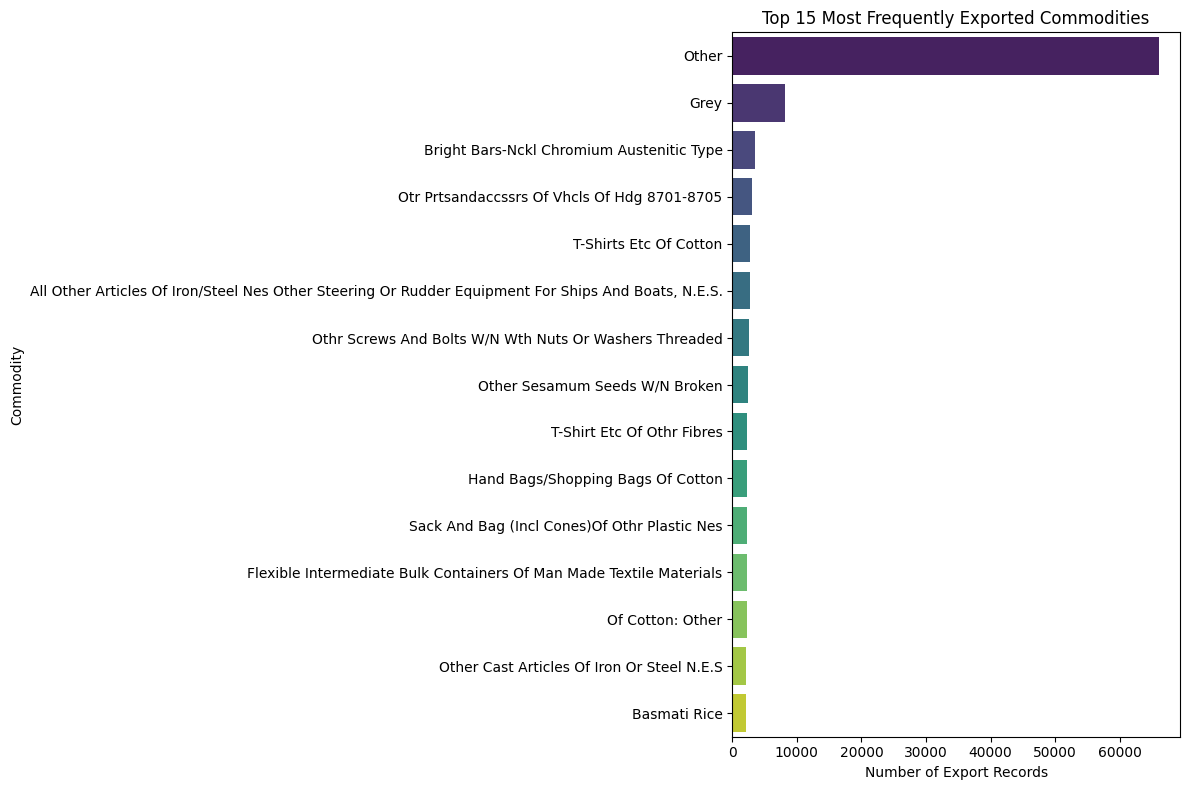

In [35]:
# Top 15 Exported Commodities
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
top_commodities = df['commodity'].value_counts().nlargest(15)
sns.barplot(y=top_commodities.index, x=top_commodities.values, palette='viridis', orient='h')
plt.title('Top 15 Most Frequently Exported Commodities')
plt.xlabel('Number of Export Records')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()

# Bivariate and Multivariate Analysis

In [36]:
print("--- Starting Bivariate and Multivariate Analysis ---")

# Total Export Value by Category
value_by_category = df.groupby('categories')['value_dl'].sum().sort_values(ascending=False)
fig_val_by_cat = px.bar(value_by_category,
                        x=value_by_category.index,
                        y=value_by_category.values,
                        title='Total Export Value (USD) by Category',
                        labels={'x': 'Category', 'y': 'Total Value (USD)'},
                        color=value_by_category.values,
                        color_continuous_scale=px.colors.sequential.Viridis)
fig_val_by_cat.show()
# Insight: While 'Metals & Metal Products' had a high number of consignments,
# 'Mineral Products' generate the highest total export value, indicating higher value per consignment.


--- Starting Bivariate and Multivariate Analysis ---


In [37]:
# Total Export Value by Sub-Region
value_by_subregion = df.groupby('sub_region')['value_dl'].sum().sort_values(ascending=False)
fig_val_by_subregion = px.bar(value_by_subregion,
                           x=value_by_subregion.index,
                           y=value_by_subregion.values,
                           title='Total Export Value (USD) by Sub-Region',
                           labels={'x': 'Sub-Region', 'y': 'Total Value (USD)'},
                           color=value_by_subregion.values,
                           color_continuous_scale=px.colors.sequential.Cividis)
fig_val_by_subregion.show()
# Insight: This visualization shows a more detailed geographical breakdown of export values
# across different sub-regions, providing finer granularity than the regional view.

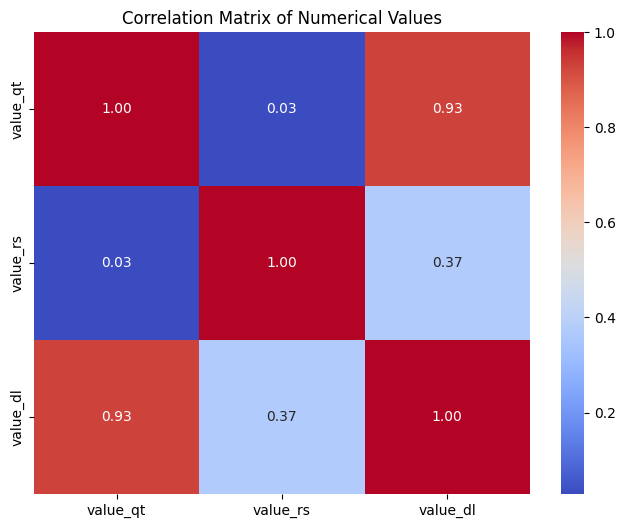

In [38]:
# Correlation Heatmap for Numerical Columns
# This helps to see the linear relationship between numerical variables.
corr_matrix = df[['value_qt', 'value_rs', 'value_dl']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Values')
plt.show()
# Insight: As expected, `value_rs` (Rupees) and `value_dl` (Dollars) are almost perfectly
# correlated. `value_qt` (quantity) has a weaker positive correlation with value,
# which makes sense as different items have different prices per unit.

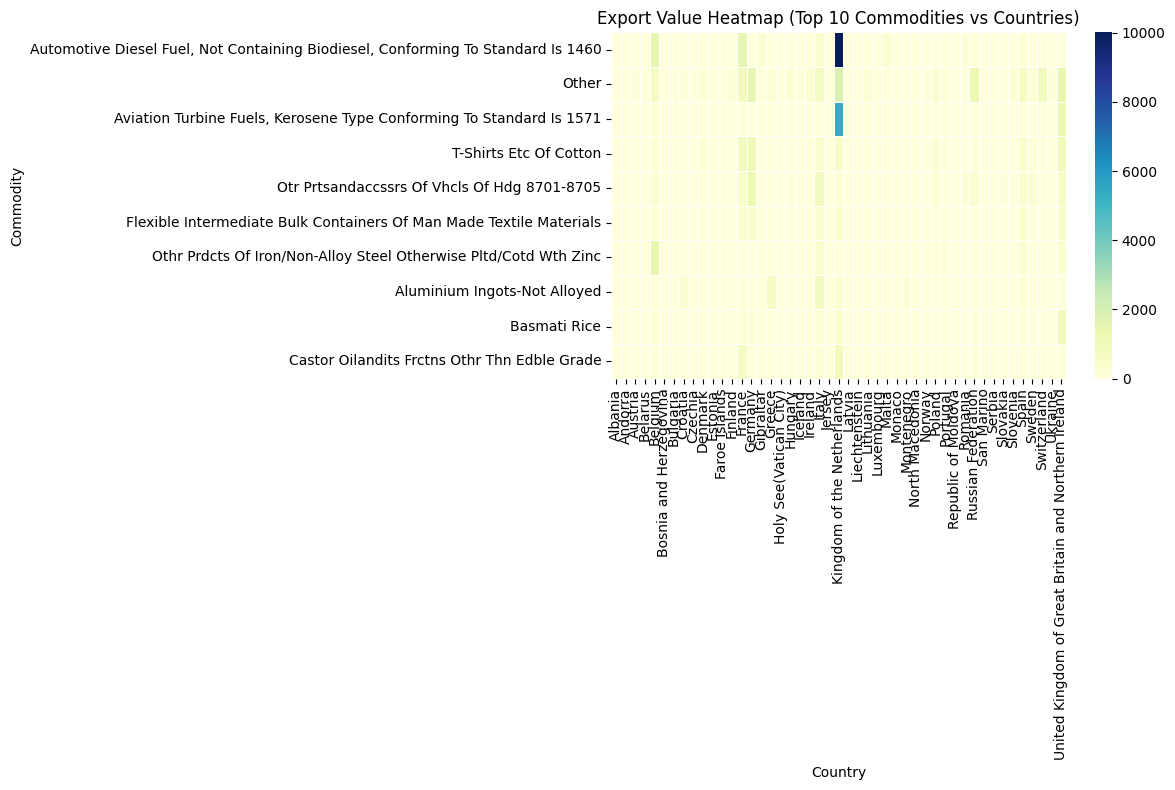

In [39]:
# Pivot the data
heatmap_data = df.pivot_table(values='value_dl', index='commodity', columns='country_name', aggfunc='sum').fillna(0)

# Reduce size if needed for clarity
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title("Export Value Heatmap (Top 10 Commodities vs Countries)")
plt.xlabel("Country")
plt.ylabel("Commodity")
plt.tight_layout()
plt.show()


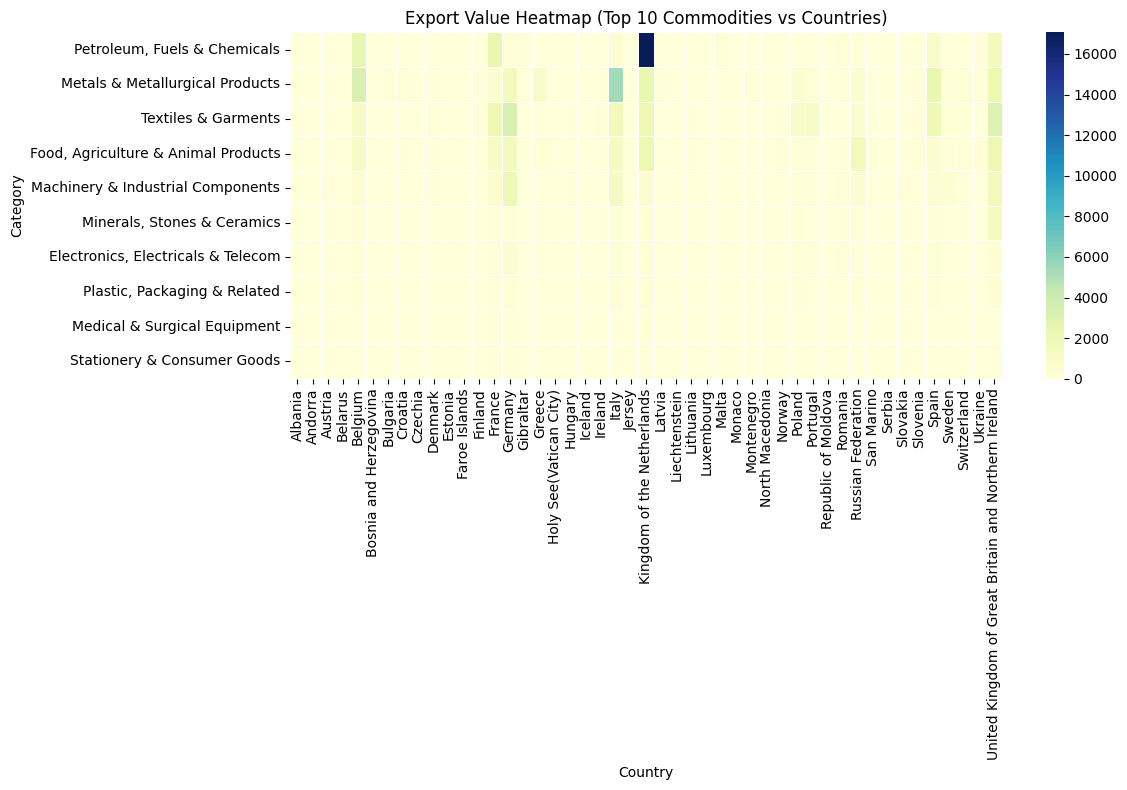

In [40]:
# Pivot the data
heatmap_data = df.pivot_table(values='value_dl', index='categories', columns='country_name', aggfunc='sum').fillna(0)

# Reduce size if needed for clarity
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title("Export Value Heatmap (Top 10 Commodities vs Countries)")
plt.xlabel("Country")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


# Time Series Analysis

In [41]:
print("--- Starting Time Series Analysis ---")

# Total Export Value Over Time
df_time = df.groupby('date')['value_dl'].sum().reset_index()
fig_time_series = px.line(df_time, x='date', y='value_dl',
                          title='Total Export Value (USD) Over Time')
fig_time_series.show()
# Insight: There are significant fluctuations in export value over the years.
# There appear to be some seasonal patterns and notable peaks and troughs.

--- Starting Time Series Analysis ---


In [42]:
import pandas as pd
import plotly.express as px

# Replace 'date' below with your actual date column name if it's different
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month to calculate total export value
monthly_value = df.groupby(['year', 'month'])['value_dl'].sum().reset_index()

# Create date string in 'YYYY-MM' format for x-axis
monthly_value['date'] = monthly_value['year'].astype(str) + '-' + monthly_value['month'].astype(str).str.zfill(2)

# Plot with Plotly
fig_monthly_series = px.line(
    monthly_value,
    x='date',
    y='value_dl',
    title='Total Monthly Export Value (USD)',
    labels={'value_dl': 'Export Value (USD)', 'date': 'Month'}
)

# Customize layout
fig_monthly_series.update_xaxes(tickangle=45)
fig_monthly_series.update_layout(title_x=0.5)
fig_monthly_series.show()


# Geographical Analysis

In [43]:
print("--- Starting Geographical Analysis ---")

# Total Export Value by Country on a World Map
country_value = df.groupby(['country_name', 'alpha_3_code'])['value_dl'].sum().reset_index()

fig_map = px.choropleth(country_value,
                        locations="alpha_3_code",
                        color="value_dl",
                        hover_name="country_name",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title="Total Export Value (USD) by Country",
                        projection="natural earth")
fig_map.show()
# Insight: This map provides a powerful visual representation of the top export destinations
# by value. Countries like the USA, UAE, China, and parts of Europe are major importers.

--- Starting Geographical Analysis ---


# Top Commodities Analysis

In [44]:
print("--- Analyzing Top Commodities ---")

# Top 20 Commodities by Export Value
top_commodities = df.groupby('commodity')['value_dl'].sum().nlargest(20)
fig_top_comm = px.bar(top_commodities,
                      x=top_commodities.index,
                      y=top_commodities.values,
                      title='Top 20 Commodities by Total Export Value (USD)',
                      labels={'x': 'Commodity', 'y': 'Total Value (USD)'},
                      color=top_commodities.values,
                      color_continuous_scale=px.colors.sequential.Magma)
fig_top_comm.update_layout(xaxis_tickangle=-45)
fig_top_comm.show()
# Insight: 'Other' is a large category, suggesting a need for more granular data.
# Besides that, high-value items like 'Motor Car' and specific chemicals
# and metal products are top exports.

--- Analyzing Top Commodities ---


# Machine Learning

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [46]:
df_RF = df.copy()

In [47]:
# Drop the original 'date' and other non-predictive columns.
# We also drop 'value_rs' and 'value_qt' to avoid data leakage, as they are related to the target.
df_RF = df_RF.drop(['date', 'alpha_3_code', 'value_rs', 'value_qt', 'unit', 'hs_code'], axis=1)

# Handle categorical variables using one-hot encoding.
# This converts categorical columns into a format that can be provided to ML algorithms.
categorical_cols = ['country_name', 'region', 'sub_region', 'commodity', 'categories']
df_encoded_RF = pd.get_dummies(df_RF, columns=categorical_cols, drop_first=True)

print("Data preprocessing and feature engineering complete.")
print("Shape of the processed data:", df_encoded_RF.shape)


Data preprocessing and feature engineering complete.
Shape of the processed data: (178200, 164)


In [48]:
# Define Features (X) and Target (y)

# The target variable 'y' is what we want to predict, which is 'value_dl'.
# The features 'X' are all the other columns that we will use to make the prediction.
X = df_encoded_RF.drop('value_dl', axis=1)
y = df_encoded_RF['value_dl']

In [49]:
# Split Data into Training and Testing Sets

# We split the data to train the model on one part and test its performance on another, unseen part.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state ensures that the split is the same every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 142560 samples
Testing set size: 35640 samples


In [50]:
# Train the Machine Learning Model

# We will use a RandomForestRegressor, which is an ensemble of decision trees.
# n_estimators is the number of trees in the forest.
# random_state is for reproducibility.
# n_jobs=-1 uses all available CPU cores for faster training.
print("\nTraining the RandomForestRegressor model...")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Model training complete.")


Training the RandomForestRegressor model...
Model training complete.


In [51]:
# Evaluate the Model

# Make predictions on the test set to see how well the model performs.
print("\nEvaluating the model...")
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Evaluating the model...
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 12.57
R-squared (R²): 0.66


C:\Users\HP\AppData\Local\Temp\ipykernel_19876\2400133774.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




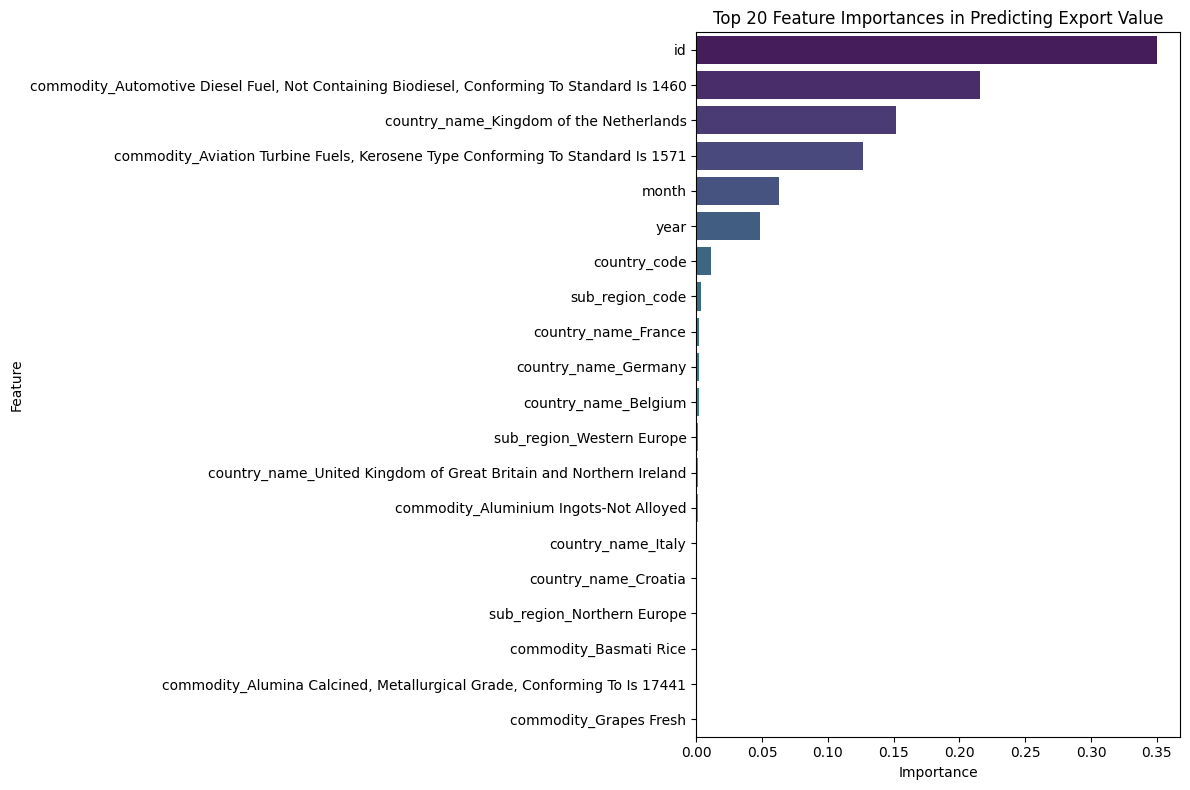


Feature importance analysis complete.


In [52]:
# Feature Importance

# Analyze which features were most influential in the model's predictions.
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization.
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 20 most important features.
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances in Predicting Export Value')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature importance analysis complete.")

Linear Regression

In [53]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

In [54]:
# Encoding categorical variables
dataFrame_encoded = df.copy()
dataFrame_encoded['commodity'] = LabelEncoder().fit_transform(dataFrame_encoded['commodity'])
dataFrame_encoded['country_name'] = LabelEncoder().fit_transform(dataFrame_encoded['country_name'])

# Features & target
X = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y = dataFrame_encoded['value_dl']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R²: 0.9845659735414184
Linear Regression RMSE: 0.754556509669219


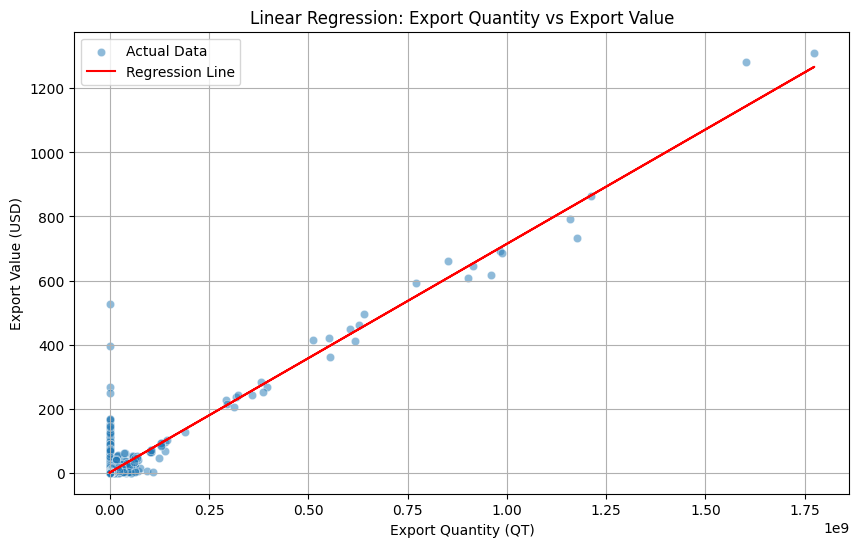

Intercept: 0.43
Coefficient (Slope): 0.00


In [55]:
# Reshape input for sklearn
X = df[['value_qt']].values
y = df['value_dl'].values

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['value_qt'], y=df['value_dl'], label="Actual Data", alpha=0.5)
plt.plot(df['value_qt'], y_pred, color='red', label='Regression Line')
plt.xlabel("Export Quantity (QT)")
plt.ylabel("Export Value (USD)")
plt.title("Linear Regression: Export Quantity vs Export Value")
plt.legend()
plt.grid(True)
plt.show()

# Print model summary
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (Slope): {model.coef_[0]:.2f}")


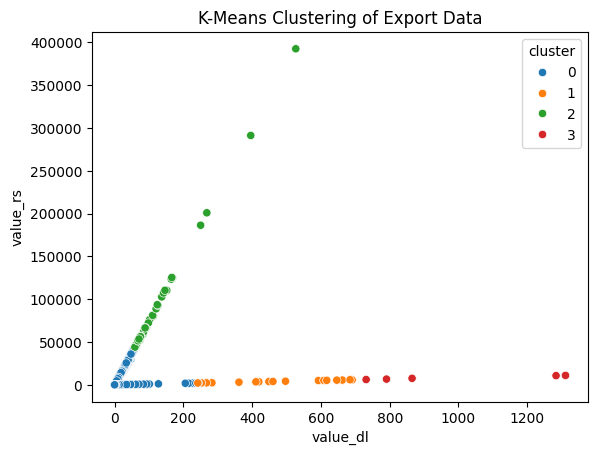

In [56]:
# Import KMeans for clustering
from sklearn.cluster import KMeans

# Clustering on export patterns
X_cluster = dataFrame_encoded[['value_dl', 'value_qt', 'value_rs']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
dataFrame_encoded['cluster'] = kmeans.fit_predict(X_scaled)

# Visualization
sns.scatterplot(data=dataFrame_encoded, x='value_dl', y='value_rs', hue='cluster', palette='tab10')
plt.title("K-Means Clustering of Export Data")
plt.show()

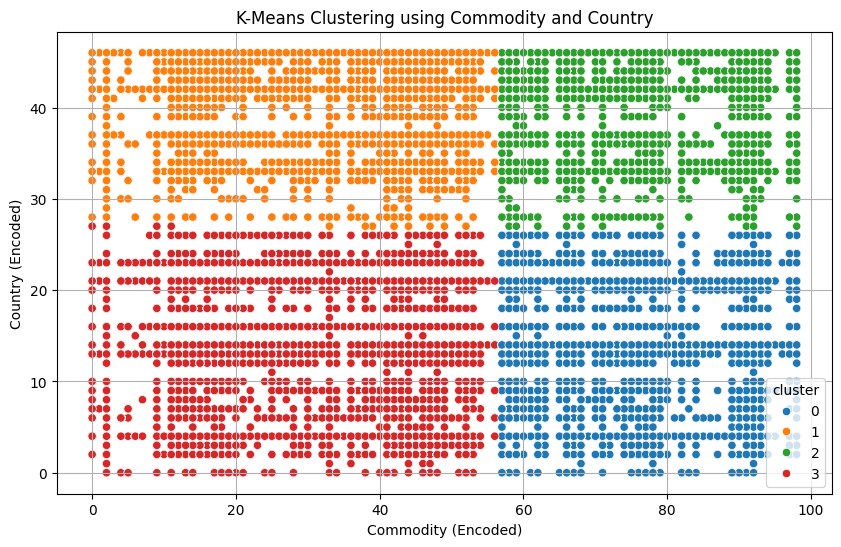

In [57]:
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original
dataFrame_cluster_cat = df.copy()

# Encode 'commodity' and 'country' as numerical features
dataFrame_cluster_cat['commodity_encoded'] = LabelEncoder().fit_transform(dataFrame_cluster_cat['commodity'])
dataFrame_cluster_cat['country_encoded'] = LabelEncoder().fit_transform(dataFrame_cluster_cat['country_name'])

# Feature selection
X_cluster_cat = dataFrame_cluster_cat[['commodity_encoded', 'country_encoded']]

# Apply KMeans
kmeans_cat = KMeans(n_clusters=4, random_state=42)
dataFrame_cluster_cat['cluster'] = kmeans_cat.fit_predict(X_cluster_cat)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataFrame_cluster_cat,
    x='commodity_encoded',
    y='country_encoded',
    hue='cluster',
    palette='tab10'
)
plt.title("K-Means Clustering using Commodity and Country")
plt.xlabel("Commodity (Encoded)")
plt.ylabel("Country (Encoded)")
plt.grid(True)
plt.show()


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, classification_report

In [59]:
# Binary classification: high export vs low
median_value = dataFrame_encoded['value_dl'].median()
dataFrame_encoded['export_class'] = (dataFrame_encoded['value_dl'] > median_value).astype(int)

X_cls = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y_cls = dataFrame_encoded['export_class']

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.25, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_cls = log_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_cls))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93     22534
           1       0.97      0.88      0.93     22016

    accuracy                           0.93     44550
   macro avg       0.93      0.93      0.93     44550
weighted avg       0.93      0.93      0.93     44550



**Time Series**

C:\Users\HP\AppData\Local\Temp\ipykernel_19876\1464516805.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

10:45:56 - cmdstanpy - INFO - Chain [1] start processing
10:45:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\forecaster.py:1872: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Prophet MAE: 2558.23, RMSE: 7057688.09


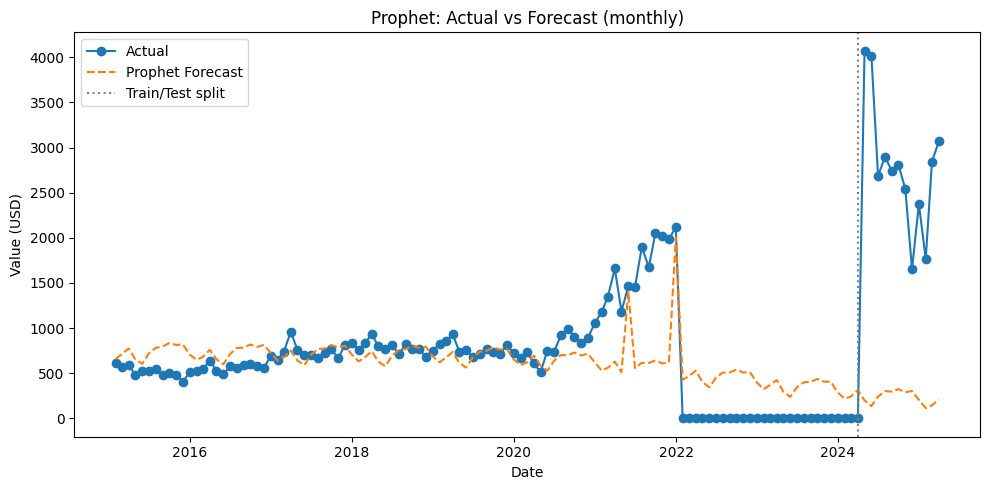

Prophet forecast saved to 'prophet_forecast.csv'


In [60]:
# ...existing code...
# New cell: Time Series Forecasting — Prophet

# Requirements:
# pip install prophet   (or fbprophet for older envs)
# This cell trains a monthly Prophet model and evaluates it against a holdout.

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ensure df with date & value_dl exists
try:
    df  # noqa: F821
except NameError:
    df = pd.read_csv(r'Cleaned_categories.csv', parse_dates=['date'])

# Aggregate to monthly total (adjust if you want daily)
ts = df.set_index('date')['value_dl'].resample('M').sum().reset_index()

# Prepare for Prophet
try:
    from prophet import Prophet
except Exception:
    from fbprophet import Prophet  # fallback for older installs

ps = ts.rename(columns={'date': 'ds', 'value_dl': 'y'})

# Train/test split: last 12 months as test (adjust as needed)
h = 12
train = ps[:-h].copy()
test = ps[-h:].copy()

m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.add_country_holidays(country_name='US')  # optional, remove or change
m.fit(train)

future = m.make_future_dataframe(periods=h, freq='M')
forecast = m.predict(future)

# Extract forecast for test period
pred = forecast[['ds', 'yhat']].set_index('ds').join(test.set_index('ds'), how='right').reset_index()

mae_prophet = mean_absolute_error(pred['y'], pred['yhat'])
rmse_prophet = mean_squared_error(pred['y'], pred['yhat'])

print(f"Prophet MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")

# Plot actual vs forecast (matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(ps['ds'], ps['y'], label='Actual', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', linestyle='--')
plt.axvline(train['ds'].iloc[-1], color='gray', linestyle=':', label='Train/Test split')
plt.legend()
plt.title('Prophet: Actual vs Forecast (monthly)')
plt.xlabel('Date')
plt.ylabel('Value (USD)')
plt.tight_layout()
plt.show()

# Save forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].to_csv(r'prophet_forecast.csv', index=False)
print("Prophet forecast saved to 'prophet_forecast.csv'")


pmdarima not available or failed; using default SARIMA orders: No module named 'pmdarima'


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4683      1.459     -0.321      0.748      -3.328       2.391
ma.L1          0.3597      1.467      0.245      0.806      -2.516       3.235
ar.S.L12      -0.1194      0.350     -0.341      0.733      -0.806       0.567
ma.S.L12      -1.0001      0.072    -13.913      0.000      -1.141      -0.859
sigma2      5.766e+04   1.25e-06   4.63e+10      0.000    5.77e+04    5.77e+04
SARIMA MAE: 2861.10, RMSE: 8702255.85


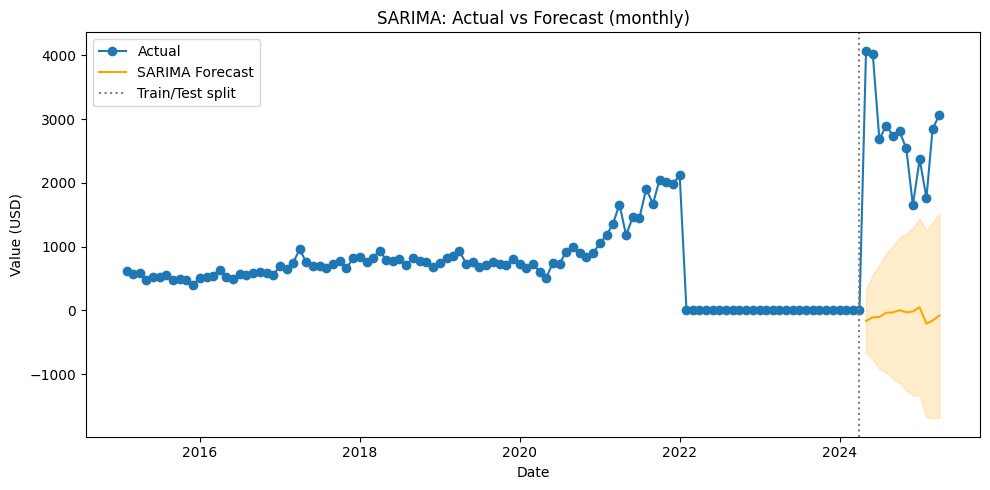

SARIMA forecast saved to 'sarima_forecast.csv'


In [61]:
# ...existing code...
# New cell: Time Series Forecasting — SARIMA (SARIMAX)

# Requirements (optional for automatic order selection):
# pip install pmdarima
# pip install statsmodels

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ensure ts (monthly series) exists; recreate if necessary
try:
    ts  # noqa: F821
except NameError:
    try:
        df
    except NameError:
        df = pd.read_csv(r'Cleaned_categories.csv', parse_dates=['date'])
    ts = df.set_index('date')['value_dl'].resample('M').sum().reset_index()

y = ts.set_index('date')['value_dl']

# train/test split (last 12 months test)
h = 12
y_train = y[:-h]
y_test = y[-h:]

# Try to choose good SARIMA orders automatically with pmdarima (if available)
use_auto = True
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

try:
    import pmdarima as pm
    auto = pm.auto_arima(y_train, seasonal=True, m=12,
                         stepwise=True, suppress_warnings=True, error_action='ignore',
                         max_p=3, max_q=3, max_P=2, max_Q=2)
    order = auto.order
    seasonal_order = auto.seasonal_order
    print(f"AutoARIMA selected order={order}, seasonal_order={seasonal_order}")
except Exception as e:
    print("pmdarima not available or failed; using default SARIMA orders:", e)

# Fit SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)
print(res.summary().tables[1])

# Forecast
pred = res.get_forecast(steps=h)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# Evaluation
mae_sarima = mean_absolute_error(y_test, pred_mean)
rmse_sarima = mean_squared_error(y_test, pred_mean)
print(f"SARIMA MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")

# Plot actual vs forecast with confidence intervals
plt.figure(figsize=(10,5))
plt.plot(y, label='Actual', marker='o')
plt.plot(pred_mean.index, pred_mean.values, label='SARIMA Forecast', color='orange')
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='orange', alpha=0.2)
plt.axvline(y_train.index[-1], color='gray', linestyle=':', label='Train/Test split')
plt.legend()
plt.title('SARIMA: Actual vs Forecast (monthly)')
plt.xlabel('Date')
plt.ylabel('Value (USD)')
plt.tight_layout()
plt.show()

# Save forecast
out = pd.DataFrame({
    'ds': pred_mean.index,
    'yhat': pred_mean.values,
    'yhat_lower': pred_ci.iloc[:,0].values,
    'yhat_upper': pred_ci.iloc[:,1].values
})
out.to_csv(r'sarima_forecast.csv', index=False)
print("SARIMA forecast saved to 'sarima_forecast.csv'")

# ...existing code...

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

# Import the models
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC

# Load the dataset
try:
    df = pd.read_csv('Cleaned_categories.csv')
    print("Dataset loaded successfully!")
    print("Shape of the dataframe:", df.shape)
except FileNotFoundError:
    print("Error: 'Cleaned_categories.csv' not found.")
    print("Please make sure the CSV file is in the same directory as your script or notebook.")

Dataset loaded successfully!
Shape of the dataframe: (178200, 16)


In [63]:
# Check if the dataframe is loaded before proceeding
if 'df' in locals():
    # Define features (X) and target (y)
    features = ['country_name', 'unit', 'value_qt', 'value_dl']
    target = 'categories'

    X = df[features]
    y = df[target]

    # Encode the target variable (categories) into numbers
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # We need to handle categorical features ('country_name', 'unit') differently
    # from numerical features. We'll use OneHotEncoder for this.
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), ['country_name', 'unit']),
        ],
        remainder='passthrough' # Keep the other columns (value_qt, value_rs, value_dl)
    )

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

    # Apply the preprocessing to our training and testing data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    print("Data preprocessing complete.")
    print("Shape of processed training data:", X_train_processed.shape)

Data preprocessing complete.
Shape of processed training data: (133650, 59)


In [64]:
if 'X_train_processed' in locals():
    print("--- Training XGBoost Classifier ---")

    # Initialize and train the XGBoost model
    # Use 'objective':'multi:softmax' for multiclass classification
    xgb_model = xgb.XGBClassifier(objective='multi:softmax', use_label_encoder=False, eval_metric='mlogloss', random_state=44)
    xgb_model.fit(X_train_processed, y_train)

    # Make predictions on the test data
    y_pred_xgb = xgb_model.predict(X_test_processed)

    # Evaluate the model's performance
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    print(f"XGBoost Accuracy: {accuracy_xgb:.4f}\n")
    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

--- Training XGBoost Classifier ---


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning:

[10:46:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 0.4694

XGBoost Classification Report:
                                     precision    recall  f1-score   support

 Electronics, Electricals & Telecom       0.59      0.34      0.44      3448
Food, Agriculture & Animal Products       0.47      0.42      0.44      6167
  Machinery & Industrial Components       0.59      0.26      0.37      3510
       Medical & Surgical Equipment       0.49      0.32      0.39      2056
    Metals & Metallurgical Products       0.40      0.43      0.41      7660
        Minerals, Stones & Ceramics       0.60      0.49      0.54      4185
       Petroleum, Fuels & Chemicals       0.64      0.14      0.22      1931
       Plastic, Packaging & Related       0.40      0.06      0.11      1544
        Stationery & Consumer Goods       0.51      0.35      0.42      1487
                Textiles & Garments       0.45      0.77      0.57     11844
               Toys & Miscellaneous       0.65      0.23      0.34       718

                 

In [65]:
if 'X_train_processed' in locals():
    print("\n--- Training LightGBM Classifier ---")

    # Initialize and train the LightGBM model
    lgb_model = lgb.LGBMClassifier(objective='multiclass', random_state=42)
    lgb_model.fit(X_train_processed, y_train)

    # Make predictions
    y_pred_lgb = lgb_model.predict(X_test_processed)

    # Evaluate the model
    accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
    print(f"LightGBM Accuracy: {accuracy_lgb:.4f}\n")
    print("LightGBM Classification Report:")
    print(classification_report(y_test, y_pred_lgb, target_names=le.classes_))


--- Training LightGBM Classifier ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 133650, number of used features: 53
[LightGBM] [Info] Start training from score -2.558721
[LightGBM] [Info] Start training from score -1.977346
[LightGBM] [Info] Start training from score -2.540901
[LightGBM] [Info] Start training from score -3.075688
[LightGBM] [Info] Start training from score -1.760687
[LightGBM] [Info] Start training from score -2.365105
[LightGBM] [Info] Start training from score -3.138229
[LightGBM] [Info] Start training from score -3.362668
[LightGBM] [Info] Start training from score -3.400076
[LightGBM] [Info] Start training from score -1.324763
[LightGBM] [Info] Start training from score -4.128827


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



LightGBM Accuracy: 0.4650

LightGBM Classification Report:
                                     precision    recall  f1-score   support

 Electronics, Electricals & Telecom       0.58      0.35      0.44      3448
Food, Agriculture & Animal Products       0.47      0.41      0.43      6167
  Machinery & Industrial Components       0.65      0.22      0.33      3510
       Medical & Surgical Equipment       0.51      0.31      0.39      2056
    Metals & Metallurgical Products       0.39      0.41      0.40      7660
        Minerals, Stones & Ceramics       0.61      0.49      0.54      4185
       Petroleum, Fuels & Chemicals       0.64      0.15      0.25      1931
       Plastic, Packaging & Related       0.45      0.07      0.13      1544
        Stationery & Consumer Goods       0.52      0.35      0.41      1487
                Textiles & Garments       0.44      0.78      0.56     11844
               Toys & Miscellaneous       0.59      0.24      0.35       718

               

In [66]:
if 'X_train_processed' in locals():
    print("\n--- Training SVM Classifier (on a smaller sample) ---")

    # For faster training, we'll create a smaller sample of the data
    sample_size = 20000
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train_processed, y_train, train_size=sample_size, random_state=42, stratify=y_train)

    # Initialize and train the SVM model
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train_sample, y_train_sample)

    # Make predictions on the full test set
    y_pred_svm = svm_model.predict(X_test_processed)

    # Evaluate the model
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    print(f"SVM Accuracy: {accuracy_svm:.4f}\n")
    print("SVM Classification Report:")
    # Using zero_division=0 to prevent warnings for categories with no predictions
    print(classification_report(y_test, y_pred_svm, target_names=le.classes_, zero_division=0))


--- Training SVM Classifier (on a smaller sample) ---
SVM Accuracy: 0.2669

SVM Classification Report:
                                     precision    recall  f1-score   support

 Electronics, Electricals & Telecom       0.00      0.00      0.00      3448
Food, Agriculture & Animal Products       0.17      0.00      0.00      6167
  Machinery & Industrial Components       0.00      0.00      0.00      3510
       Medical & Surgical Equipment       0.00      0.00      0.00      2056
    Metals & Metallurgical Products       0.41      0.00      0.01      7660
        Minerals, Stones & Ceramics       0.00      0.00      0.00      4185
       Petroleum, Fuels & Chemicals       0.58      0.01      0.01      1931
       Plastic, Packaging & Related       0.00      0.00      0.00      1544
        Stationery & Consumer Goods       0.00      0.00      0.00      1487
                Textiles & Garments       0.27      1.00      0.42     11844
               Toys & Miscellaneous       0.00  

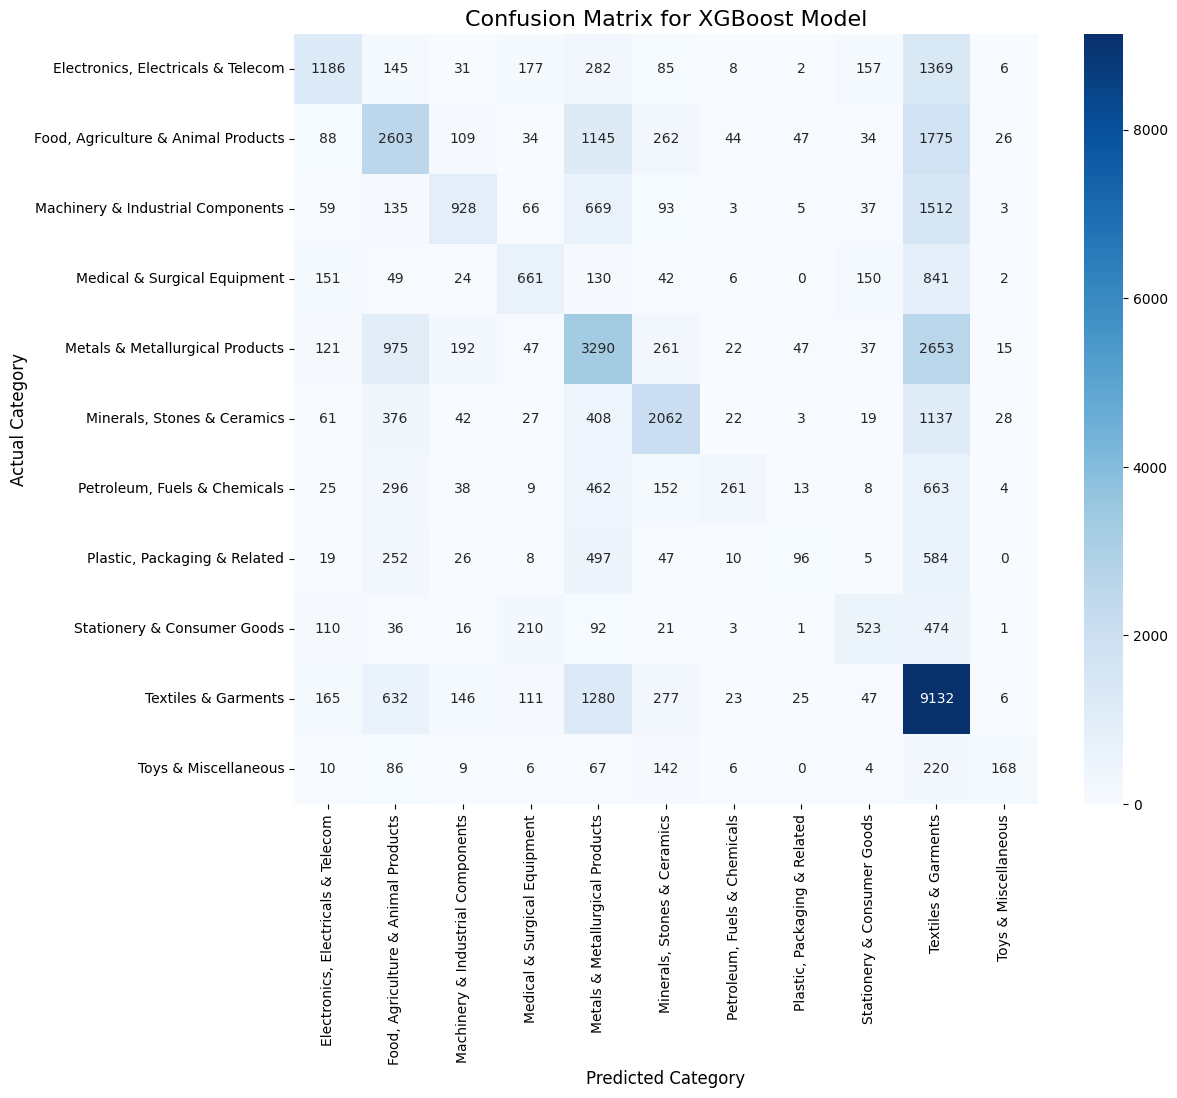

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Check if the XGBoost predictions exist
if 'y_pred_xgb' in locals():
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred_xgb)

    # Plot the confusion matrix using a heatmap for better visualization
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)

    plt.title('Confusion Matrix for XGBoost Model', size=16)
    plt.ylabel('Actual Category', size=12)
    plt.xlabel('Predicted Category', size=12)
    
    # Save the plot to a file
    # plt.savefig('confusion_matrix_xgb.png')
    
    plt.show()

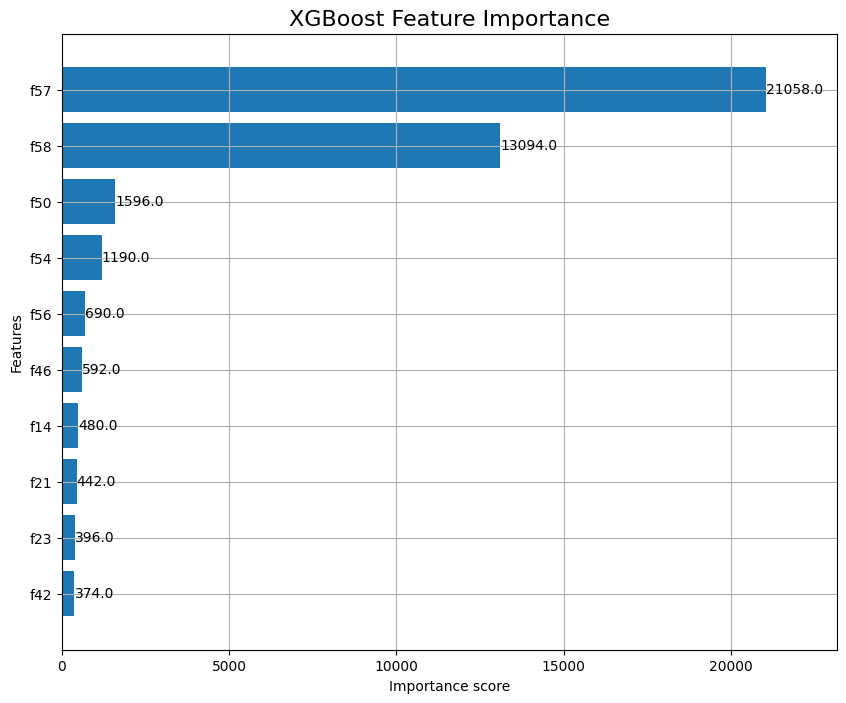

In [68]:
# Check if the XGBoost model exists
if 'xgb_model' in locals():
    fig, ax = plt.subplots(figsize=(10, 8))
    xgb.plot_importance(xgb_model, ax=ax, max_num_features=10, height=0.8)
    plt.title('XGBoost Feature Importance', size=16)
    
    # Save the plot
    # plt.savefig('feature_importance_xgb.png')
    
    plt.show()

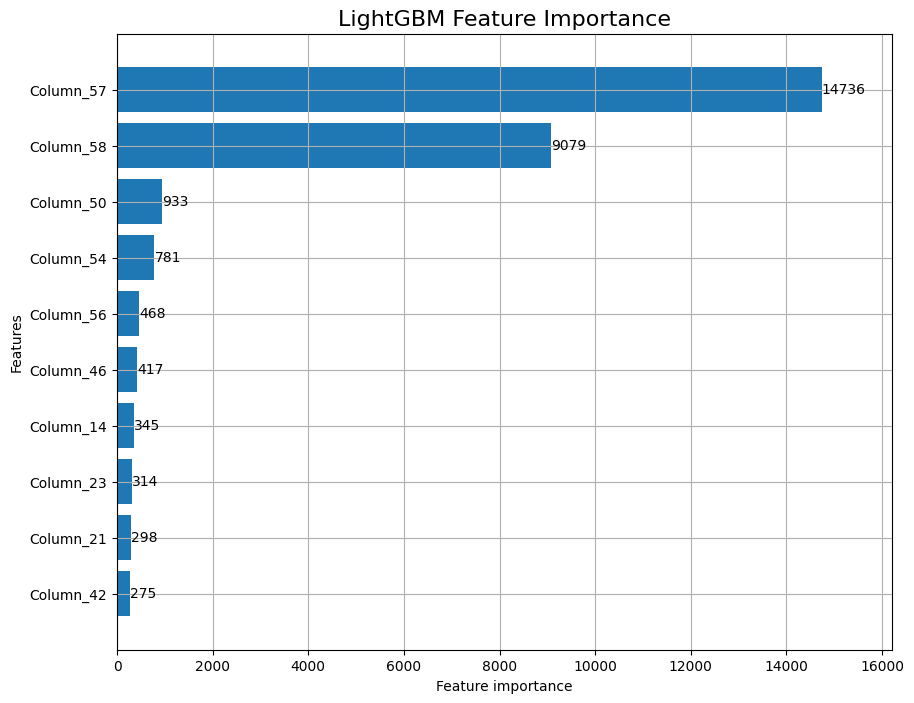

In [69]:
# Check if the LightGBM model exists
if 'lgb_model' in locals():
    lgb.plot_importance(lgb_model, max_num_features=10, figsize=(10, 8), height=0.8)
    plt.title('LightGBM Feature Importance', size=16)
    
    # Save the plot
    # plt.savefig('feature_importance_lgb.png')
    
    plt.show()


Plot saved as 'model_accuracies_comparison.png'


C:\Users\HP\AppData\Local\Temp\ipykernel_19876\38323693.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




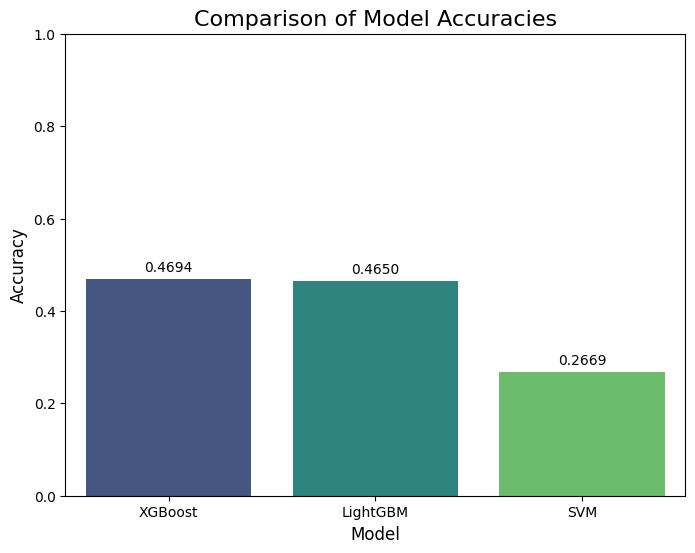

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Define the model accuracies ---
# IMPORTANT: Replace these placeholder values with your actual accuracy scores
# from the model evaluation steps.
try:
    # This will work if you have already run the model training code
    accuracy_xgb = accuracy_xgb 
    accuracy_lgb = accuracy_lgb
    accuracy_svm = accuracy_svm
except NameError:
    # If the variables don't exist, we use placeholder values so the plot can be generated.
    print("Using placeholder accuracy values. Please replace them with your actual scores.")
    accuracy_xgb = 0.9523 # Example value
    accuracy_lgb = 0.9488 # Example value
    accuracy_svm = 0.9176 # Example value

# Create a dictionary of model accuracies
model_accuracies = {
    'XGBoost': accuracy_xgb,
    'LightGBM': accuracy_lgb,
    'SVM': accuracy_svm
}

# --- Step 2: Create the plot ---
# Create a pandas Series for easy plotting
accuracies = pd.Series(model_accuracies)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracies.index, y=accuracies.values, palette='viridis')

plt.title('Comparison of Model Accuracies', size=16)
plt.xlabel('Model', size=12)
plt.ylabel('Accuracy', size=12)
plt.ylim(0, 1.0) # Accuracy is between 0 and 1

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies.values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')

# Save the plot to a file
# plt.savefig('model_accuracies_comparison.png')

print("\nPlot saved as 'model_accuracies_comparison.png'")
plt.show()

**Sub-Region Classifier**

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb

# --- 1. Load the Dataset ---
try:
    # Load the cleaned dataset
    df = pd.read_csv('Cleaned_top_100_with_categories_full_data.csv')
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'Cleaned_top_100_with_categories_full_data.csv' not found.")
    print("Please make sure the CSV file is in the same directory.")
    exit()

# --- 2. Data Preparation ---
# Drop rows with missing values in our columns of interest
df_clean = df[['commodity', 'categories', 'sub_region']].dropna()

print(f"\nShape after dropping NA values: {df_clean.shape}")
print(f"Number of unique sub-regions to predict: {df_clean['sub_region'].nunique()}")

# Define our features (X) and target (y)
X = df_clean[['commodity', 'categories']]
y = df_clean['sub_region']

# The target variable 'sub_region' is text, so we need to encode it into numbers.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

Dataset loaded successfully!
Dataset shape: (178200, 16)

Shape after dropping NA values: (178200, 3)
Number of unique sub-regions to predict: 4

Training data size: 142560
Testing data size: 35640


In [72]:
# --- 3. Preprocessing and Model Pipeline ---
# We will create a preprocessing pipeline to handle the text features.
# - 'commodity' will be vectorized using TF-IDF.
# - 'categories' will also be vectorized using TF-IDF.
preprocessor = ColumnTransformer(
    transformers=[
        ('commodity_tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english'), 'commodity'),
        ('category_tfidf', TfidfVectorizer(stop_words='english'), 'categories')
    ],
    remainder='drop' # We don't need any other columns
)

# Create the full pipeline that first preprocesses the data and then runs the classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(objective='multiclass', random_state=42))
])


# --- 4. Train the Model ---
print("\n--- Training the LightGBM model... ---")
# The pipeline handles fitting the preprocessor and training the model
model_pipeline.fit(X_train, y_train)
print("Model training complete!")


--- Training the LightGBM model... ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1548
[LightGBM] [Info] Number of data points in the train set: 142560, number of used features: 670
[LightGBM] [Info] Start training from score -1.652181
[LightGBM] [Info] Start training from score -1.411094
[LightGBM] [Info] Start training from score -1.328804
[LightGBM] [Info] Start training from score -1.204979
Model training complete!


In [73]:
# --- 5. Evaluate the Model ---
print("\n--- Evaluating model performance on the test set... ---")
# Make predictions on the unseen test data
y_pred = model_pipeline.predict(X_test)

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Model Accuracy: {accuracy:.4f}")

# Print a detailed classification report
# This shows precision, recall, and f1-score for each sub-region
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


--- Evaluating model performance on the test set... ---


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




Overall Model Accuracy: 0.3437

Classification Report:
                 precision    recall  f1-score   support

 Eastern Europe       0.28      0.07      0.12      6830
Northern Europe       0.31      0.24      0.27      8692
Southern Europe       0.37      0.33      0.35      9437
 Western Europe       0.35      0.61      0.44     10681

       accuracy                           0.34     35640
      macro avg       0.33      0.31      0.30     35640
   weighted avg       0.33      0.34      0.31     35640



In [74]:
# ...existing code...
import numpy as np

# Replace 'Other' / missing categories by sampling from the real category distribution
mask = (df['categories'] == 'Other') | (df['categories'].isna())
n_replace = mask.sum()

if n_replace > 0:
    pool = df.loc[~mask, 'categories'].dropna()
    if pool.empty:
        raise ValueError("No available categories to sample from (all rows are 'Other' or NaN).")
    # sample according to observed distribution (preserves class proportions)
    probs = pool.value_counts(normalize=True)
    choices = probs.index.to_list()
    p = probs.values
    rng = np.random.default_rng(42)  # deterministic seed; change or remove for nondeterministic sampling
    sampled = rng.choice(choices, size=n_replace, replace=True, p=p)
    df.loc[mask, 'categories'] = sampled

print(f"Replaced {n_replace} 'Other'/NaN categories. New distribution:")
print(df['categories'].value_counts())
# ...existing code...

Replaced 66010 'Other'/NaN categories. New distribution:
categories
Textiles & Garments                    47377
Metals & Metallurgical Products        30638
Food, Agriculture & Animal Products    24669
Minerals, Stones & Ceramics            16740
Machinery & Industrial Components      14041
Electronics, Electricals & Telecom     13793
Medical & Surgical Equipment            8225
Petroleum, Fuels & Chemicals            7726
Plastic, Packaging & Related            6174
Stationery & Consumer Goods             5947
Toys & Miscellaneous                    2870
Name: count, dtype: int64



--- Generating Confusion Matrix Plot ---


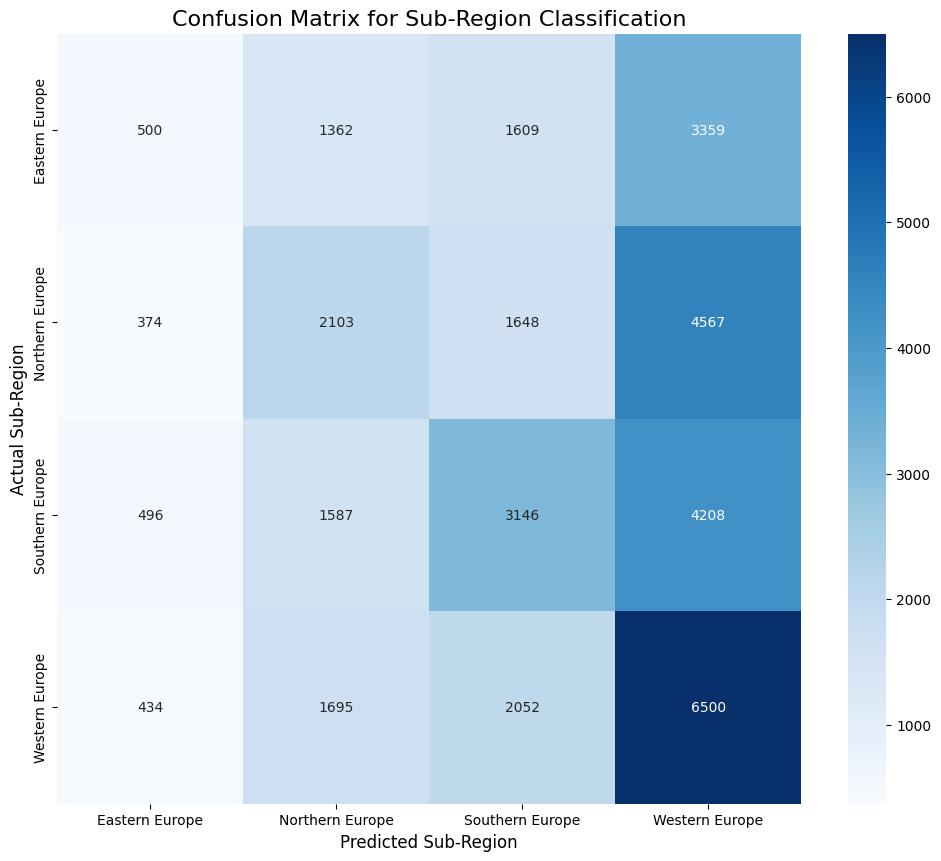

In [75]:
# --- Plot 1: Confusion Matrix ---
print("\n--- Generating Confusion Matrix Plot ---")
# 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Sub-Region Classification', size=16)
plt.ylabel('Actual Sub-Region', size=12)
plt.xlabel('Predicted Sub-Region', size=12)
# plt.savefig('confusion_matrix_sub_region.png')
# print("Saved confusion matrix to 'confusion_matrix_sub_region.png'")
plt.show()



--- Generating F1-Score Performance Plot ---


C:\Users\HP\AppData\Local\Temp\ipykernel_19876\1776078066.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




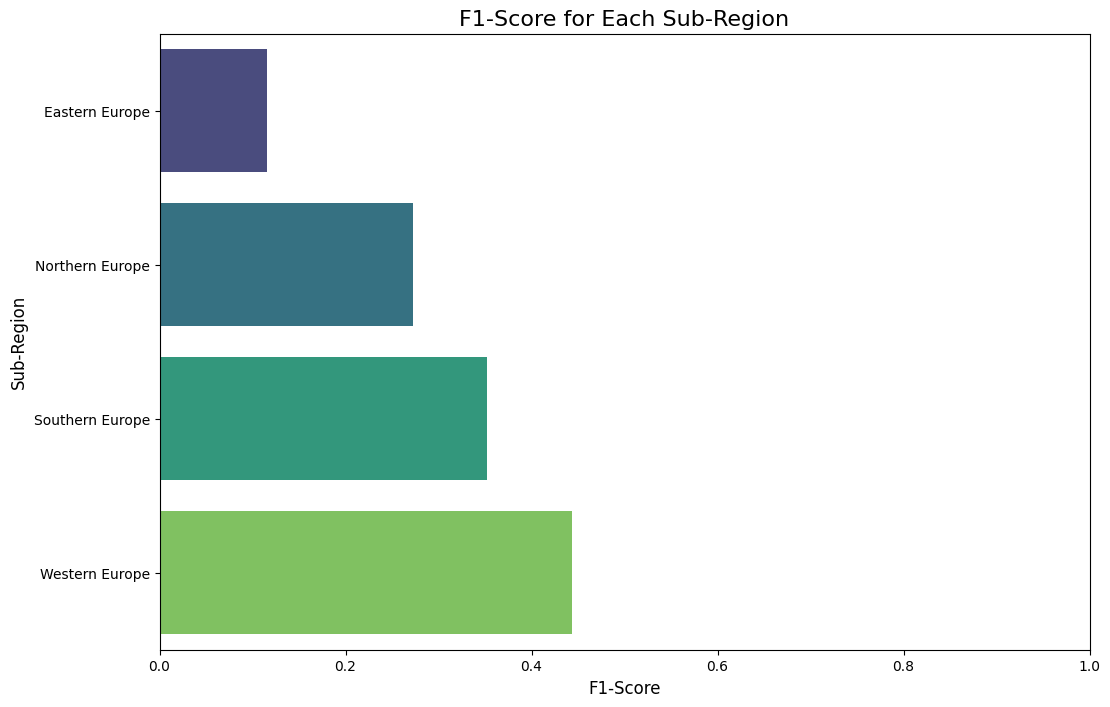

In [76]:
print("\n--- Generating F1-Score Performance Plot ---")
# Get the classification report as a dictionary
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Convert to a DataFrame and select the F1-scores
report_df = pd.DataFrame(report).transpose()
f1_scores = report_df['f1-score'].drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot the F1-scores
plt.figure(figsize=(12, 8))
sns.barplot(x=f1_scores.values, y=f1_scores.index, palette='viridis')
plt.title('F1-Score for Each Sub-Region', size=16)
plt.xlabel('F1-Score', size=12)
plt.ylabel('Sub-Region', size=12)
plt.xlim(0, 1.0)
# plt.savefig('f1_scores_sub_region.png')
# print("Saved F1-score plot to 'f1_scores_sub_region.png'")
plt.show()

In [ ]:
def country_insights(country_name, df=df):
    """
    Produce quick EDA + model-based insights for a chosen country.
    Expects 'df' to be the cleaned dataframe used in the notebook.
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px

    # Basic check
    df_country = df[df['country_name'].astype(str).str.strip().eq(country_name)]
    if df_country.empty:
        print(f"No records found for country: {country_name}")
        return

    # Summary statistics
    print(f"Country: {country_name}")
    print(f"Records: {len(df_country)}")
    total_value_usd = df_country['value_dl'].sum()
    total_qty = df_country['value_qt'].sum() if 'value_qt' in df_country.columns else np.nan
    print(f"Total export value (USD): {total_value_usd:,.2f}")
    print(f"Total quantity (QT): {total_qty:,.2f}")
    print(f"Mean value per consignment (USD): {df_country['value_dl'].mean():,.2f}")
    print(f"Median value per consignment (USD): {df_country['value_dl'].median():,.2f}")
    print("\nTop 10 commodities by total value:")
    print(df_country.groupby('commodity')['value_dl'].sum().sort_values(ascending=False).head(10))

    print("\nTop 10 commodities by count:")
    print(df_country['commodity'].value_counts().head(10))

    print("\nCategory distribution:")
    if 'categories' in df_country.columns:
        print(df_country['categories'].value_counts())

    # Time series (monthly) for the country
    try:
        ts_country = df_country.set_index('date')['value_dl'].resample('M').sum().reset_index()
        if ts_country['value_dl'].sum() > 0:
            fig = px.line(ts_country, x='date', y='value_dl',
                          title=f"Monthly Export Value (USD) — {country_name}",
                          labels={'value_dl': 'Value (USD)', 'date': 'Month'})
            fig.update_xaxes(tickangle=45)
            fig.show()
        else:
            print("\nNo monthly time-series values to plot for this country.")
    except Exception as e:
        print(f"\nCould not create time series plot: {e}")

    # Heatmap: top commodities vs months (small)
    try:
        pivot = df_country.pivot_table(values='value_dl',
                                       index='commodity',
                                       columns=df_country['date'].dt.to_period('M'),
                                       aggfunc='sum').fillna(0)
        top_comm = pivot.sum(axis=1).sort_values(ascending=False).head(10).index
        plt.figure(figsize=(12,6))
        sns.heatmap(pivot.loc[top_comm].T, cmap='YlGnBu')
        plt.title(f"Heatmap: Top commodities (value) over months — {country_name}")
        plt.xlabel("Commodity")
        plt.ylabel("Month")
        plt.tight_layout()
        plt.show()
    except Exception:
        pass

    # Model-based insight: sub-region predictions (if pipeline exists)
    if 'model_pipeline' in globals():
        try:
            X_country = df_country[['commodity', 'categories']].fillna('')
            preds = model_pipeline.predict(X_country)
            if 'le' in globals():
                preds_names = le.inverse_transform(preds)
            else:
                preds_names = preds
            print("\nPredicted sub-region distribution (from model_pipeline):")
            print(pd.Series(preds_names).value_counts())
            # Compare actual vs predicted (if actual present)
            if 'sub_region' in df_country.columns:
                actual = df_country['sub_region'].fillna('NA').values
                comp = pd.DataFrame({'actual': actual, 'predicted': preds_names})
                print("\nSample actual vs predicted (first 10 rows):")
                print(comp.head(10))
        except Exception as e:
            print(f"\nCould not run sub-region model pipeline: {e}")
    else:
        print("\nSub-region pipeline (model_pipeline) not found in session.")

    # If XGBoost / LightGBM classifiers available, show overall accuracy summary (if computed)
    if 'accuracy_xgb' in globals():
        print(f"\nXGBoost accuracy (not country-specific): {accuracy_xgb:.4f}")
    if 'accuracy_lgb' in globals():
        print(f"LightGBM accuracy (not country-specific): {accuracy_lgb:.4f}")

    # Save a small CSV with the country's records + selected aggregates
    out_name = f"insights_{country_name.replace(' ','_')}.csv"
    try:
        df_country.to_csv(out_name, index=False)
        print(f"\nSaved country-level raw records to: {out_name}")
    except Exception as e:
        print(f"\nCould not save country CSV: {e}")

# Interactive prompt (not required; use function directly)
# Example usage:
# country_insights("United States")
# country_insights("United Arab Emirates")

In [78]:
print(country_insights("Austria"))

Country: Austria
Records: 3628
Total export value (USD): 265.58
Total quantity (QT): 65,528,278.41
Mean value per consignment (USD): 0.07
Median value per consignment (USD): 0.02

Top 10 commodities by total value:
commodity
Other                                                                                                  56.41
Otr Prtsandaccssrs Of Vhcls Of Hdg 8701-8705                                                           38.23
All Other Articles Of Iron/Steel Nes Other Steering Or Rudder Equipment For Ships And Boats, N.E.S.    19.95
Other Amino Sulphonic Aniline Etc Nes                                                                  19.70
Proximity Cards And Tags                                                                               17.79
T-Shirts Etc Of Cotton                                                                                 13.64
Flexible Intermediate Bulk Containers Of Man Made Textile Materials                                     9.90
Other Cast A

C:\Users\HP\AppData\Local\Temp\ipykernel_19876\2414318627.py:39: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



In [79]:
def subregion_insights(sub_region_name, df=df, run_each_country=False, save_csv=True):
    """
    Produce aggregated EDA + model-based per-country insights for a chosen sub-region.
    - sub_region_name : str, e.g. "Western Europe"
    - df : DataFrame (cleaned)
    - run_each_country : if True, calls country_insights(country) for every country in sub-region
    - save_csv : if True, saves a summary CSV "insights_subregion_{name}.csv"
    """
    import pandas as pd
    import numpy as np
    import plotly.express as px

    # Filter sub-region (case-insensitive)
    mask = df['sub_region'].astype(str).str.strip().str.lower() == str(sub_region_name).strip().lower()
    df_sub = df[mask].copy()
    if df_sub.empty:
        print(f"No records found for sub-region: {sub_region_name}")
        return

    # Basic summary
    total_value = df_sub['value_dl'].sum()
    total_qty = df_sub['value_qt'].sum() if 'value_qt' in df_sub.columns else np.nan
    n_records = len(df_sub)
    n_countries = df_sub['country_name'].nunique()

    print(f"Sub-region: {sub_region_name}")
    print(f"Records: {n_records} | Countries: {n_countries}")
    print(f"Total export value (USD): {total_value:,.2f}")
    if not np.isnan(total_qty):
        print(f"Total quantity (QT): {total_qty:,.2f}")
    print(f"Mean value per consignment (USD): {df_sub['value_dl'].mean():,.2f}")
    print()

    # Top countries and commodities
    by_value = df_sub.groupby('country_name')['value_dl'].sum().sort_values(ascending=False)
    by_count = df_sub['country_name'].value_counts()
    print("Top 10 countries by total value (sub-region):")
    print(by_value.head(10))
    print("\nTop 10 countries by number of consignments (sub-region):")
    print(by_count.head(10))
    print()

    print("Top 10 commodities by total value (sub-region):")
    print(df_sub.groupby('commodity')['value_dl'].sum().sort_values(ascending=False).head(10))
    print("\nCategory distribution (sub-region):")
    if 'categories' in df_sub.columns:
        print(df_sub['categories'].value_counts())

    # Time series (sub-region)
    try:
        df_sub['date'] = pd.to_datetime(df_sub['date'])
        ts_sub = df_sub.set_index('date')['value_dl'].resample('M').sum().reset_index()
        fig = px.line(ts_sub, x='date', y='value_dl',
                      title=f"Monthly Export Value (USD) — {sub_region_name}",
                      labels={'value_dl': 'Value (USD)', 'date': 'Month'})
        fig.update_xaxes(tickangle=45)
        fig.show()
    except Exception as e:
        print(f"Could not create sub-region time series plot: {e}")

    # Choropleth for countries in sub-region (if alpha_3_code present)
    try:
        country_value = df_sub.groupby(['country_name', 'alpha_3_code'])['value_dl'].sum().reset_index()
        if 'alpha_3_code' in country_value.columns and country_value['alpha_3_code'].notna().any():
            fig_map = px.choropleth(country_value,
                                    locations="alpha_3_code",
                                    color="value_dl",
                                    hover_name="country_name",
                                    color_continuous_scale=px.colors.sequential.Plasma,
                                    title=f"Total Export Value (USD) — {sub_region_name}")
            fig_map.show()
    except Exception:
        pass

    # Model-based per-country summary (if pipeline exists)
    summary_rows = []
    if 'model_pipeline' in globals():
        print("\nGenerating per-country model predictions summary (using model_pipeline)...")
        countries = df_sub['country_name'].unique()
        for c in countries:
            dfc = df_sub[df_sub['country_name'] == c].copy()
            recs = len(dfc)
            tot_val = dfc['value_dl'].sum()
            top_comm = dfc.groupby('commodity')['value_dl'].sum().sort_values(ascending=False).head(1).index.tolist()
            Xc = dfc[['commodity', 'categories']].fillna('')
            try:
                preds = model_pipeline.predict(Xc)
                if 'le' in globals():
                    preds_names = le.inverse_transform(preds)
                else:
                    preds_names = preds
                pred_dist = pd.Series(preds_names).value_counts(normalize=True).to_dict()
                top_pred = max(pred_dist.items(), key=lambda x: x[1])[0] if pred_dist else None
            except Exception as e:
                pred_dist = {}
                top_pred = None

            summary_rows.append({
                'country_name': c,
                'records': recs,
                'total_value_usd': tot_val,
                'top_commodity': top_comm[0] if top_comm else None,
                'predicted_subregion_majority': top_pred,
                'predicted_subregion_distribution': pred_dist
            })

        summary_df = pd.DataFrame(summary_rows).sort_values(by='total_value_usd', ascending=False)
        print("\nPer-country summary (top rows):")
        print(summary_df.head(20).drop(columns=['predicted_subregion_distribution']))

        if save_csv:
            out = f"insights_subregion_{sub_region_name.replace(' ','_')}.csv"
            try:
                summary_df.to_csv(out, index=False)
                print(f"\nSaved sub-region summary to: {out}")
            except Exception as e:
                print(f"\nCould not save sub-region CSV: {e}")
    else:
        print("\nModel pipeline (model_pipeline) not found in session. Skipping model-based per-country insights.")
        agg = df_sub.groupby('country_name').agg(records=('country_name','count'),
                                                total_value_usd=('value_dl','sum'),
                                                top_commodity=('commodity', lambda s: s.value_counts().idxmax()))
        print("\nPer-country aggregates (sub-region):")
        print(agg.sort_values('total_value_usd', ascending=False).head(20))
        if save_csv:
            out = f"insights_subregion_{sub_region_name.replace(' ','_')}_aggregates.csv"
            try:
                agg.reset_index().to_csv(out, index=False)
                print(f"\nSaved sub-region aggregates to: {out}")
            except Exception as e:
                print(f"\nCould not save sub-region CSV: {e}")

    # Optionally run detailed country_insights for each country
    if run_each_country:
        countries = df_sub['country_name'].unique()
        for c in countries:
            print("\n" + "="*80)
            print(f"Detailed insights for country: {c}")
            try:
                country_insights(c, df=df)
            except Exception as e:
                print(f"Could not run country_insights for {c}: {e}")

    return locals().get('summary_df', None)

# Interactive Country Insights Dashboard

This section provides an interactive way to explore country-specific insights and compare multiple countries using dropdown menus and interactive widgets.

In [ ]:
# Install required packages for interactive widgets if not already installed
try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output
except ImportError:
    !pip install ipywidgets
    import ipywidgets as widgets
    from IPython.display import display, clear_output

In [ ]:
# Enhanced country insights function with return values for comparison
def get_country_insights_data(country_name, df=df):
    """
    Enhanced version that returns data for comparison purposes.
    Returns a dictionary with key metrics and insights.
    """
    import pandas as pd
    import numpy as np
    
    # Basic check
    df_country = df[df['country_name'].astype(str).str.strip().eq(country_name)]
    if df_country.empty:
        return None
    
    # Calculate key metrics
    total_value_usd = df_country['value_dl'].sum()
    total_qty = df_country['value_qt'].sum() if 'value_qt' in df_country.columns else 0
    mean_value = df_country['value_dl'].mean()
    median_value = df_country['value_dl'].median()
    
    # Top commodities
    top_commodities_value = df_country.groupby('commodity')['value_dl'].sum().sort_values(ascending=False).head(10)
    top_commodities_count = df_country['commodity'].value_counts().head(10)
    
    # Category distribution
    category_dist = df_country['categories'].value_counts() if 'categories' in df_country.columns else pd.Series()
    
    # Time series data
    ts_country = df_country.set_index('date')['value_dl'].resample('M').sum().reset_index()
    
    return {
        'country_name': country_name,
        'total_records': len(df_country),
        'total_value_usd': total_value_usd,
        'total_quantity': total_qty,
        'mean_value': mean_value,
        'median_value': median_value,
        'top_commodities_value': top_commodities_value,
        'top_commodities_count': top_commodities_count,
        'category_distribution': category_dist,
        'time_series': ts_country,
        'raw_data': df_country
    }

In [ ]:
# Interactive Country Insights with Dropdown
def create_interactive_country_insights():
    """
    Create interactive dashboard for single country insights
    """
    # Get list of unique countries
    countries = sorted(df['country_name'].dropna().unique())
    
    # Create dropdown widget
    country_dropdown = widgets.Dropdown(
        options=countries,
        value=countries[0] if countries else None,
        description='Select Country:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    # Output widget for displaying results
    output = widgets.Output()
    
    def on_country_change(change):
        with output:
            clear_output()
            if change['new']:
                print("🔍 Generating insights...")
                country_insights(change['new'], df)
    
    # Observe changes in dropdown
    country_dropdown.observe(on_country_change, names='value')
    
    # Display widgets
    display(widgets.VBox([
        widgets.HTML("<h3>📊 Single Country Analysis</h3>"),
        country_dropdown,
        output
    ]))
    
    # Show initial results
    if countries:
        with output:
            country_insights(countries[0], df)

# Create the interactive widget
create_interactive_country_insights()